## Projeto AceleraDev Data Science
## Objetivo

O objetivo deste produto é fornecer um serviço automatizado que recomenda leads para um usuário dado sua atual lista de clientes (Portfólio).

## Contextualização
Algumas empresas gostariam de saber quem são as demais empresas em um determinado mercado (população) que tem maior probabilidade se tornarem seus próximos clientes. Ou seja, a sua solução deve encontrar no mercado quem são os leads mais aderentes dado as características dos clientes presentes no portfólio do usuário.

Além disso, sua solução deve ser agnóstica ao usuário. Qualquer usuário com uma lista de clientes que queira explorar esse mercado pode extrair valor do serviço.


### Bases de Dados:

   - Mercado: Base com informações sobre as empresas do Mercado a ser considerado.
   - Portfolio 1: Ids dos clientes da empresa 1
   - Portfolio 2: Ids dos clientes da empresa 2
   - Portfolio 3 : Ids dos clientes da empresa 3

**As bases de portfólio poderão ser utilizadas para testar a aderência da solução. Além disso, se a equipe desejar, poderá simular portfólios por meio de amostragens no mercado.**

### Requisitos técnicos obrigatórios

- Utilizar técnicas de data science e machine learning para desenvolver o projeto;

- Apresentar o desenvolvimento e outputs do modelo em um Jupyter Notebook ou outra tecnologia de apresentação de Output de modelos de Machine Learning;

- A análise deve considerar os seguintes pontos: análise exploratória dos dados, tratamento dos dados, avaliação de algoritmos, treinamento do modelo, avaliação de performance do modelo e visualização dos resultados;

- Para a apresentação do projeto, o tempo entre o treinamento do modelo e o output deve ser menor que 20 min.


## Etapas:
   - Carregando as bibliotecas
   - Carregando a base de dados pré-filtrada
   - Aplicando LabelEncoder
   - Padronizando os dados (StandardScaler)
   - Criando vários clusters usando KMeans
   - Selecionando o número ideal de Clusters
   - Utilizando PCA para a redução de dimensionalidade e visualização dos dados e seus respectivos centróides.
   - Avaliando a distribuição de Clusters nos dados do mercado e nos portifólios
   - Avaliação visual das características de cada Cluster
   - Salvando resultados em CSV
   - Conclusão

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

C:\Users\geyon\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
market = pd.read_csv('market_processed.csv')

In [3]:
ids_market = market.id
market = market.drop('id',axis=1)
market_scale = market.copy()
encoder = LabelEncoder()


for variaveis in market.columns:
    if market_scale[variaveis].dtype == 'object':
        market_scale[variaveis] = encoder.fit_transform(market_scale[variaveis])

In [4]:
scale = StandardScaler()
market_scale = scale.fit_transform(market_scale)
market_scale = pd.DataFrame(market_scale)
market_scale.columns = market.columns
market_scale.head()

,sg_uf,natureza_juridica_macro,de_ramo,idade_emp_cat,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,qt_filiais
0,0.925065,-1.626774,-0.190962,-0.673788,-0.129315,-0.055818,1.002531,1.134659,-0.343036,-0.196535,-1.301759,-0.066683,0.509336,-1.493061,-1.400902,0.078677,-0.061322
1,0.217048,0.640300,0.831845,-1.218032,-1.424163,-1.661169,0.569263,-0.116629,0.648969,-1.716142,-0.205347,-0.514265,1.549874,0.653940,0.713707,-0.018523,-0.061322
2,-1.198987,0.640300,1.956933,0.414699,2.281781,2.237542,-1.452651,-1.367917,-0.343036,0.129095,0.891064,-0.961846,0.261588,-1.761437,-1.665228,-0.023845,-0.061322
3,-1.198987,0.640300,1.240968,0.414699,1.745982,1.549534,-1.452651,-1.367917,-0.343036,0.129095,0.891064,-0.961846,0.261588,0.653940,0.713707,-0.018523,-0.061322
4,0.925065,0.640300,1.445530,-1.218032,1.879932,-0.514490,1.002531,1.134659,-0.343036,0.237638,-1.301759,-0.066683,0.509336,0.653940,0.713707,-0.018523,-0.061322


In [5]:
min_clusters = 2
max_clusters = 10
inertias = np.zeros(shape= (max_clusters - min_clusters +1,))

In [6]:
for i in range(min_clusters, max_clusters+1):
    km = KMeans(n_clusters= i, random_state=42)
    km.fit(market_scale)
    inertias[i-min_clusters] = km.inertia_

In [7]:
def optimal_number_of_clusters(inertias):
    x1, y1 = 2, inertias[0]
    x2, y2 = 20, inertias[len(inertias)-1]

    distances = []
    for i in range(len(inertias)):
        x0 = i+2
        y0 = inertias[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [8]:
n = optimal_number_of_clusters(inertias)
n

7

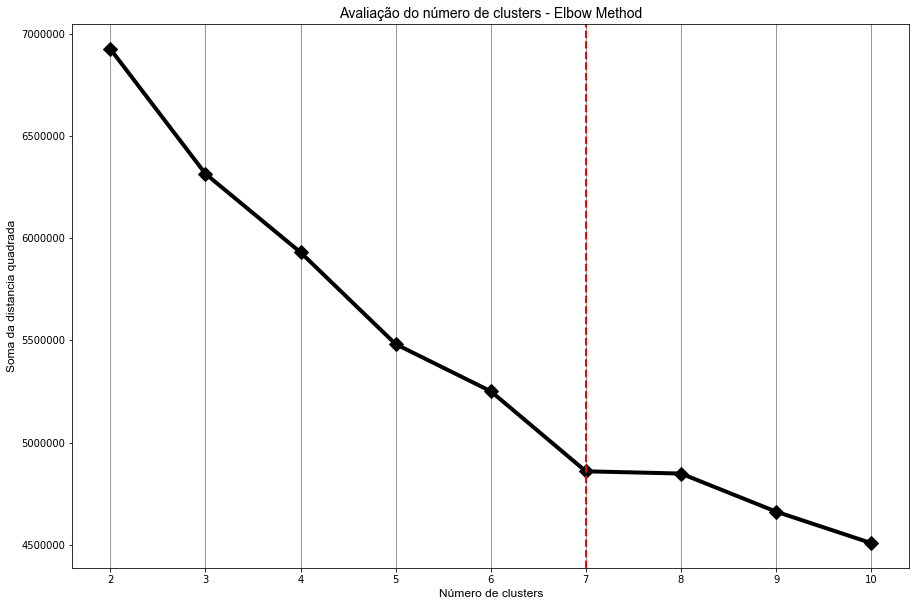

In [9]:
plt.figure(figsize=[15,10])
plt.plot(range(min_clusters,max_clusters+1), inertias, linewidth =4, color= 'black', marker='D', markersize=10)
plt.title("Avaliação do número de clusters - Elbow Method", family='Arial', fontsize=14, color='black')
plt.xlabel("Número de clusters", family='Arial', fontsize=12, color='black')
plt.ylabel("Soma da distancia quadrada", family='Arial', fontsize=12, color='black')
plt.grid(which = 'both',color='black', axis='x', alpha=0.5)
n_clusters = n #adicionado após já ter rodado os códigos abaixo
plt.axvline(x=n_clusters, linewidth=2, color='red', linestyle='--')

plt.show()

In [10]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(market_scale)
test_e = KMeans(n_clusters=n, random_state=42)
fitted = test_e.fit(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)
centers = fitted.cluster_centers_

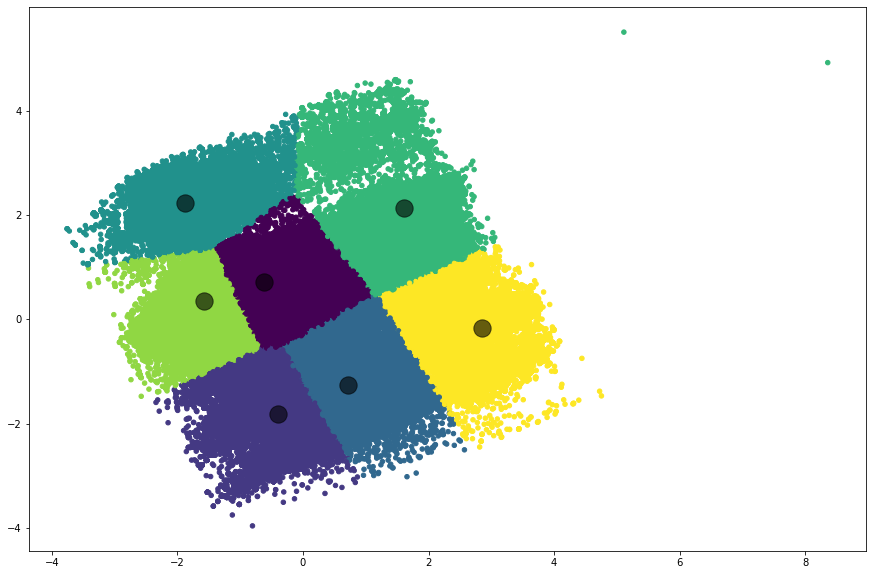

In [11]:
plt.figure(figsize=[15,10])
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=20, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [12]:
modelo2 = KMeans(n_clusters=n, random_state=42)
fitted = modelo2.fit(market_scale)

In [13]:
market_scale['Clusters'] = fitted.labels_
market['Clusters'] = fitted.labels_

In [14]:
market_scale.head()

,sg_uf,natureza_juridica_macro,de_ramo,idade_emp_cat,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,qt_filiais,Clusters
0,0.925065,-1.626774,-0.190962,-0.673788,-0.129315,-0.055818,1.002531,1.134659,-0.343036,-0.196535,-1.301759,-0.066683,0.509336,-1.493061,-1.400902,0.078677,-0.061322,1
1,0.217048,0.640300,0.831845,-1.218032,-1.424163,-1.661169,0.569263,-0.116629,0.648969,-1.716142,-0.205347,-0.514265,1.549874,0.653940,0.713707,-0.018523,-0.061322,6
2,-1.198987,0.640300,1.956933,0.414699,2.281781,2.237542,-1.452651,-1.367917,-0.343036,0.129095,0.891064,-0.961846,0.261588,-1.761437,-1.665228,-0.023845,-0.061322,1
3,-1.198987,0.640300,1.240968,0.414699,1.745982,1.549534,-1.452651,-1.367917,-0.343036,0.129095,0.891064,-0.961846,0.261588,0.653940,0.713707,-0.018523,-0.061322,5
4,0.925065,0.640300,1.445530,-1.218032,1.879932,-0.514490,1.002531,1.134659,-0.343036,0.237638,-1.301759,-0.066683,0.509336,0.653940,0.713707,-0.018523,-0.061322,6


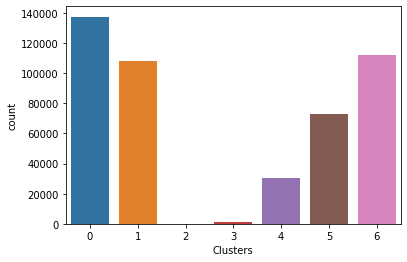

In [15]:
sns.countplot(market_scale.Clusters);

In [16]:
## Avaliando os portifólios!

In [17]:
portifolio1 = pd.read_csv('estaticos_portfolio1.csv')
portifolio2 = pd.read_csv('estaticos_portfolio2.csv')
portifolio3 = pd.read_csv('estaticos_portfolio3.csv')

In [18]:
market_scale['id'] = ids_market

In [19]:
market_scale = market_scale[['id','sg_uf', 'natureza_juridica_macro', 'de_ramo', 'idade_emp_cat',
       'nm_divisao', 'nm_segmento', 'sg_uf_matriz', 'de_saude_tributaria',
       'de_saude_rescencia', 'nu_meses_rescencia', 'de_nivel_atividade',
       'nm_meso_regiao', 'nm_micro_regiao', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo', 'vl_faturamento_estimado_aux',
       'qt_filiais', 'Clusters']]
market_scale.head()

,id,sg_uf,natureza_juridica_macro,de_ramo,idade_emp_cat,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,qt_filiais,Clusters
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,0.925065,-1.626774,-0.190962,-0.673788,-0.129315,-0.055818,1.002531,1.134659,-0.343036,-0.196535,-1.301759,-0.066683,0.509336,-1.493061,-1.400902,0.078677,-0.061322,1
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,0.217048,0.640300,0.831845,-1.218032,-1.424163,-1.661169,0.569263,-0.116629,0.648969,-1.716142,-0.205347,-0.514265,1.549874,0.653940,0.713707,-0.018523,-0.061322,6
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,-1.198987,0.640300,1.956933,0.414699,2.281781,2.237542,-1.452651,-1.367917,-0.343036,0.129095,0.891064,-0.961846,0.261588,-1.761437,-1.665228,-0.023845,-0.061322,1
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,-1.198987,0.640300,1.240968,0.414699,1.745982,1.549534,-1.452651,-1.367917,-0.343036,0.129095,0.891064,-0.961846,0.261588,0.653940,0.713707,-0.018523,-0.061322,5
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,0.925065,0.640300,1.445530,-1.218032,1.879932,-0.514490,1.002531,1.134659,-0.343036,0.237638,-1.301759,-0.066683,0.509336,0.653940,0.713707,-0.018523,-0.061322,6


In [20]:
#Criando uma lista com os ids do portifólio1
ids_portifolio1 = list(set(market_scale['id']).intersection(set(portifolio1.id)))
ids_portifolio2 = list(set(market_scale['id']).intersection(set(portifolio2.id)))
ids_portifolio3 = list(set(market_scale['id']).intersection(set(portifolio3.id)))

In [21]:
portifolio1_cluster = market.loc[market_scale.id.isin(ids_portifolio1),:]
portifolio2_cluster = market.loc[market_scale.id.isin(ids_portifolio2),:]
portifolio3_cluster = market.loc[market_scale.id.isin(ids_portifolio3),:]

In [22]:
portifolio1_cluster.head(1)

,sg_uf,natureza_juridica_macro,de_ramo,idade_emp_cat,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,qt_filiais,Clusters
369,PI,OUTROS,COMERCIO VAREJISTA,<= 1,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,PI,CINZA,SEM INFORMACAO,23.0,BAIXA,SUDOESTE PIAUIENSE,SAO RAIMUNDO NONATO,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,0,4


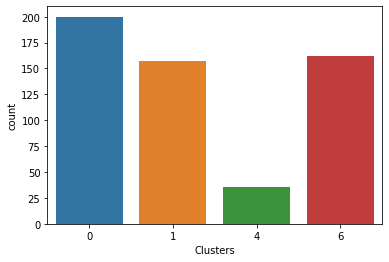

In [23]:
sns.countplot(portifolio1_cluster.Clusters);

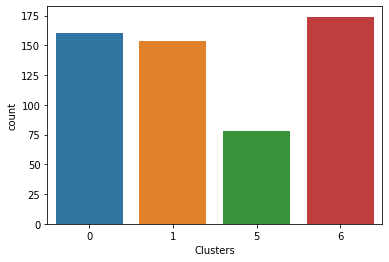

In [24]:
sns.countplot(portifolio2_cluster.Clusters);

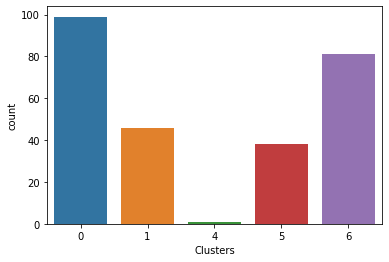

In [25]:
sns.countplot(portifolio3_cluster.Clusters);

In [26]:
#Avaliação gráfica - Colunas com muita variabilidade não foram plotadas.
colunas = list(market.columns[:-3:])
colunas.remove('nm_divisao')

In [27]:
def generate_countplot(df_column):
    plt.figure(figsize=(11,6))
    chart = sns.countplot(y=sorted(df_column))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

## Avaliando os clusters

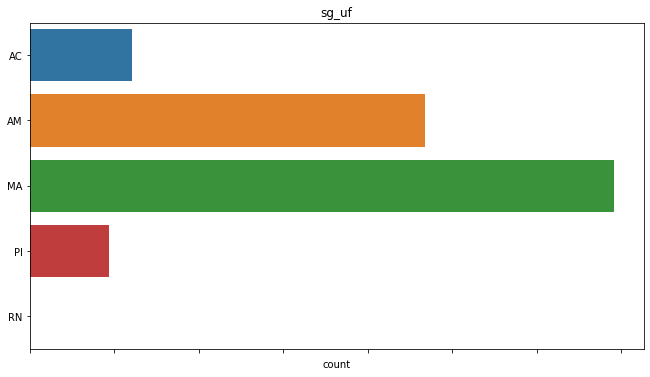

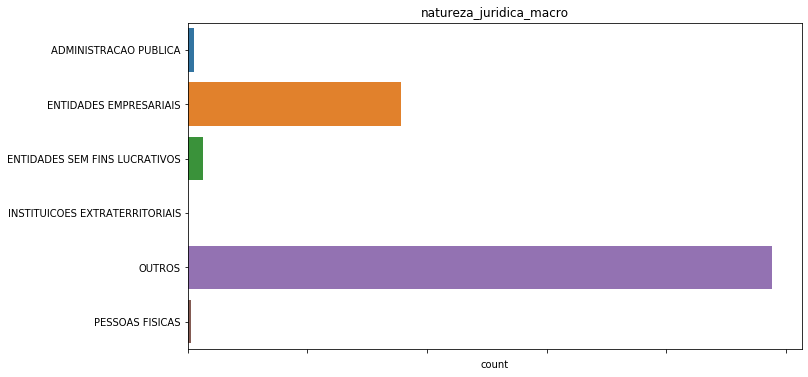

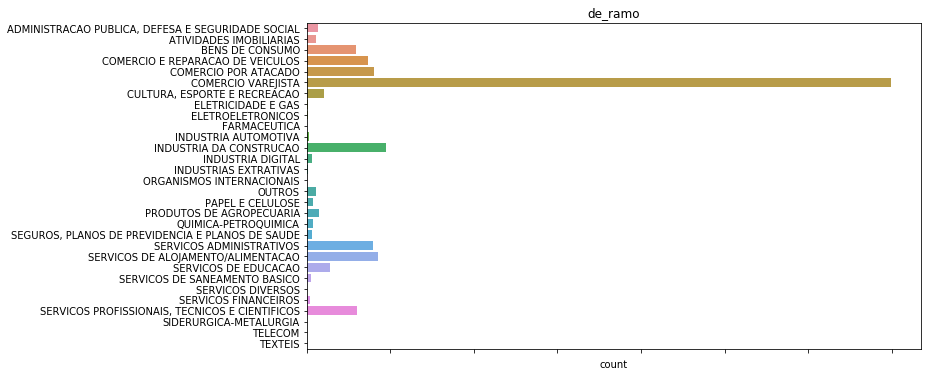

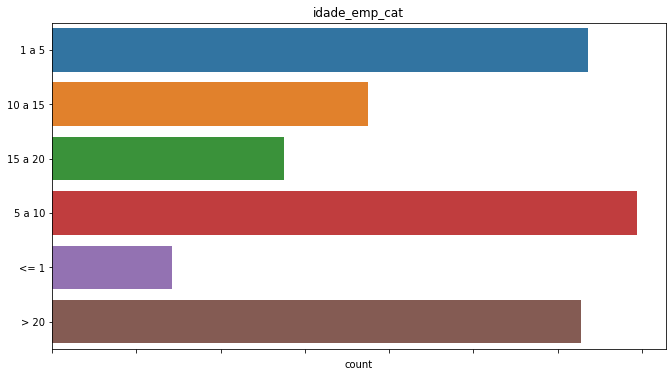

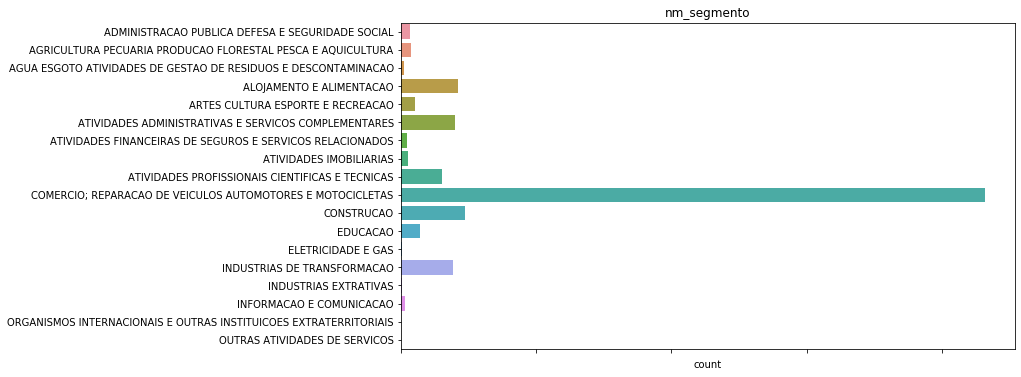

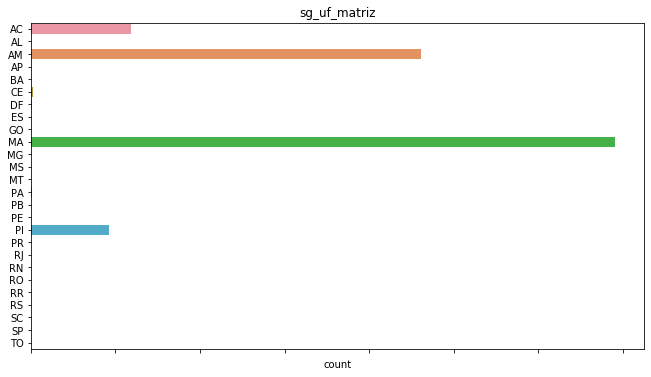

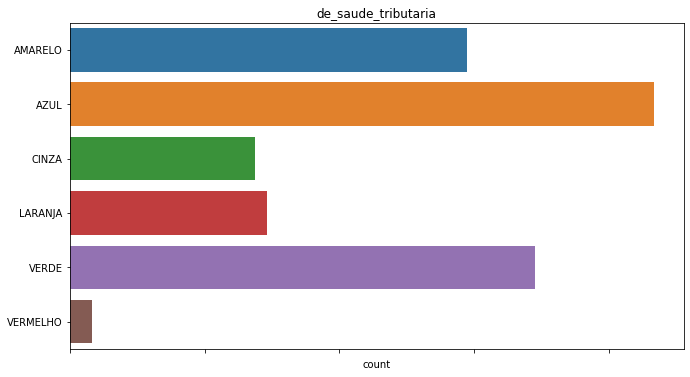

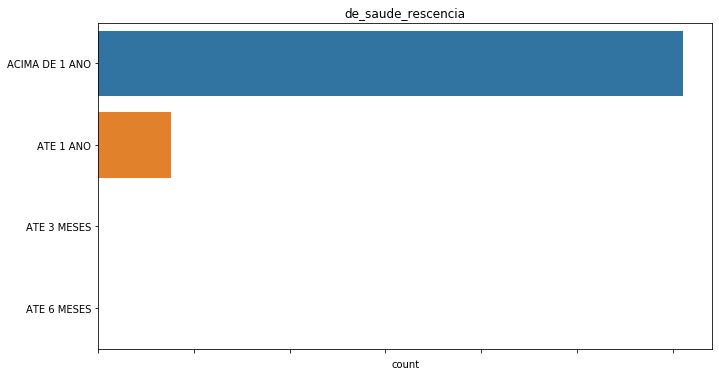

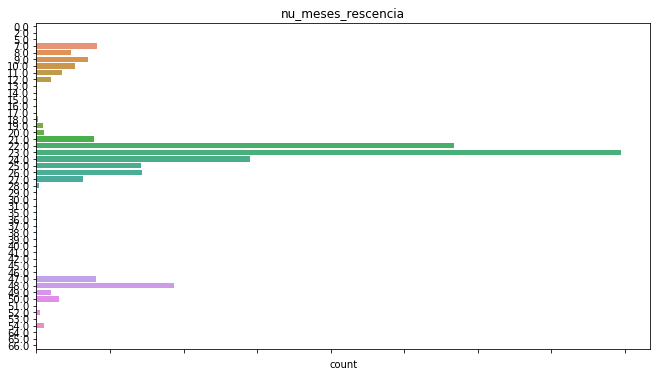

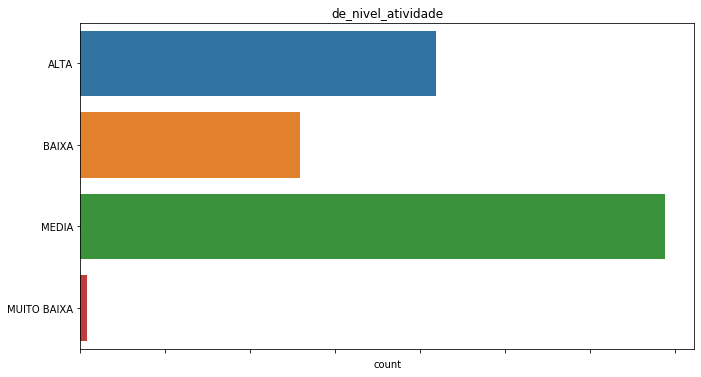

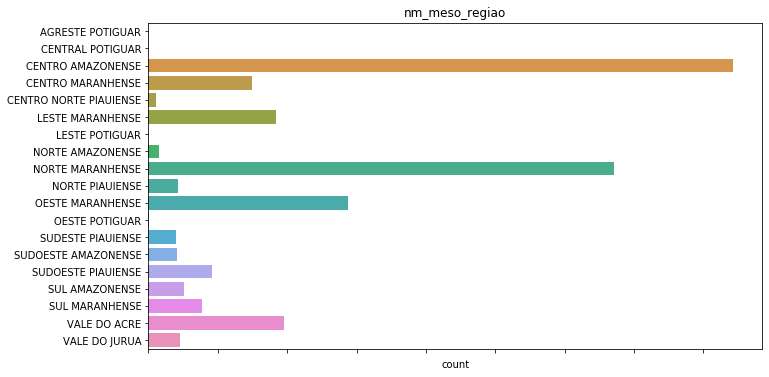

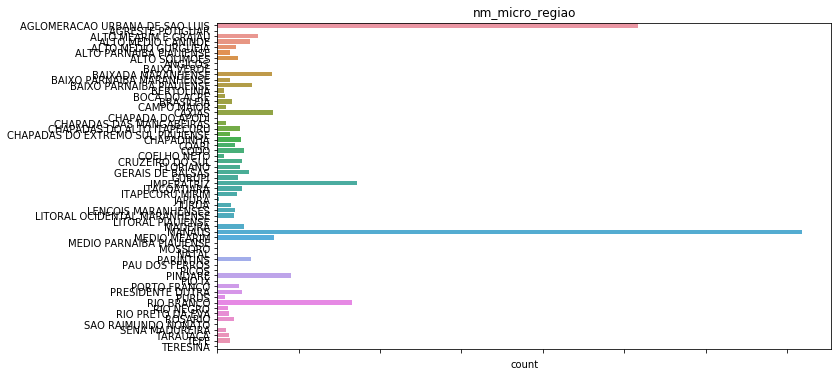

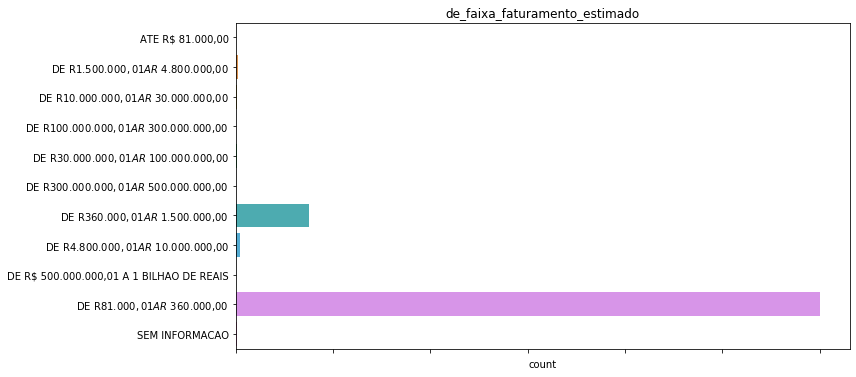

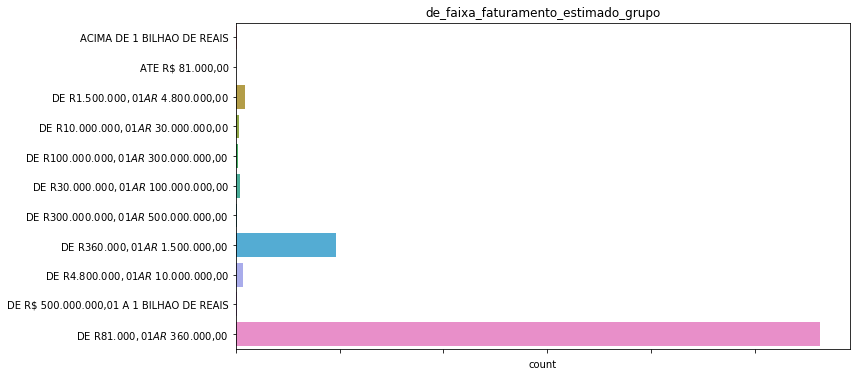

In [28]:
for i in range(len(colunas)):
    generate_countplot(market.loc[market.Clusters== 0,:][colunas[i]])
    plt.title(colunas[i])

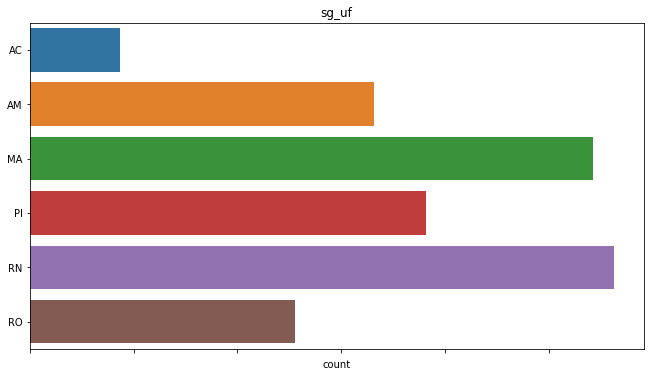

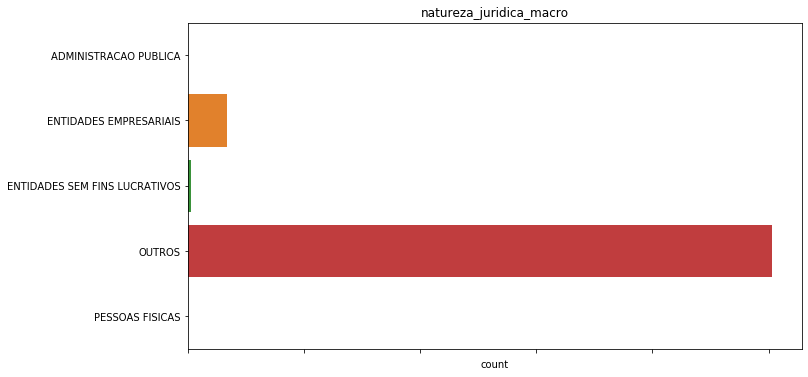

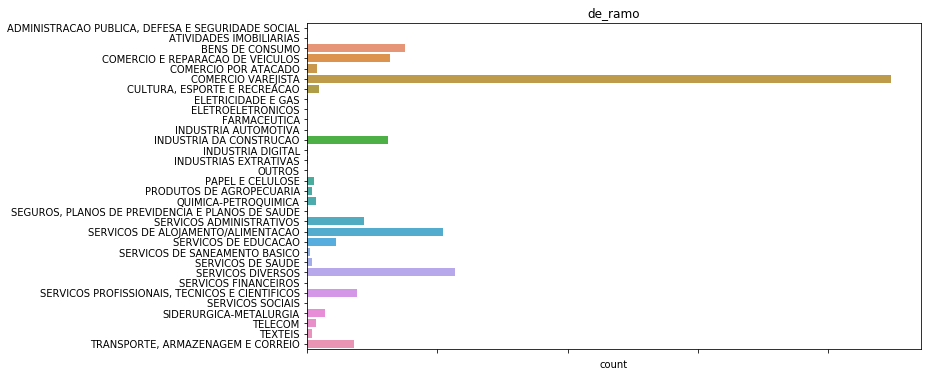

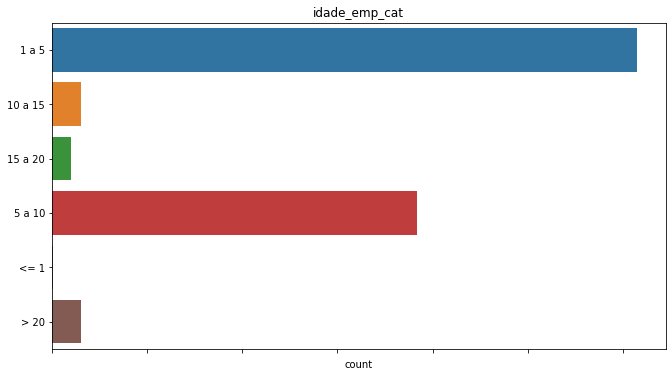

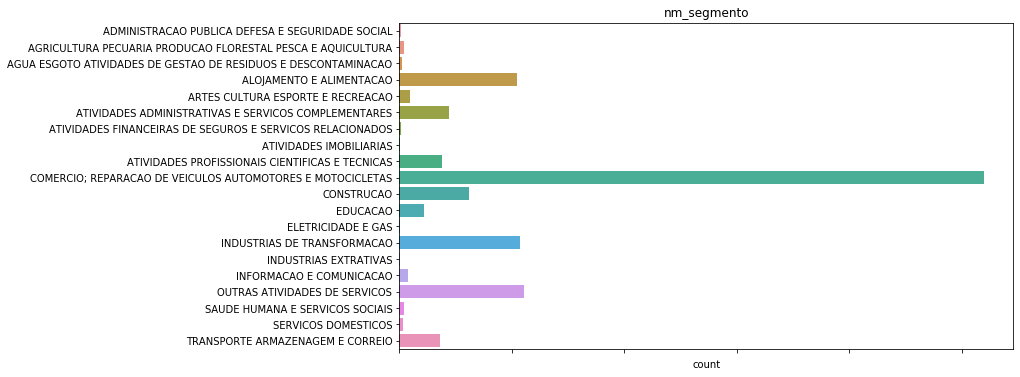

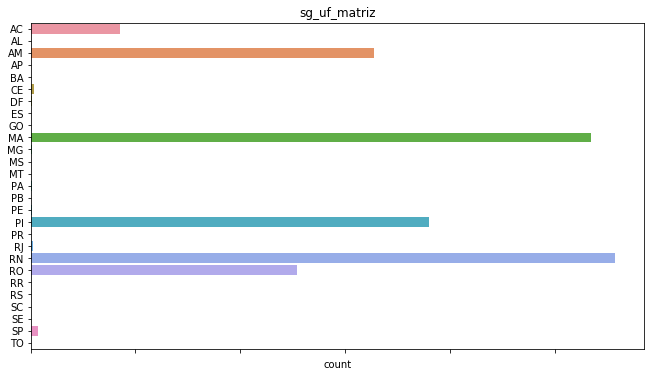

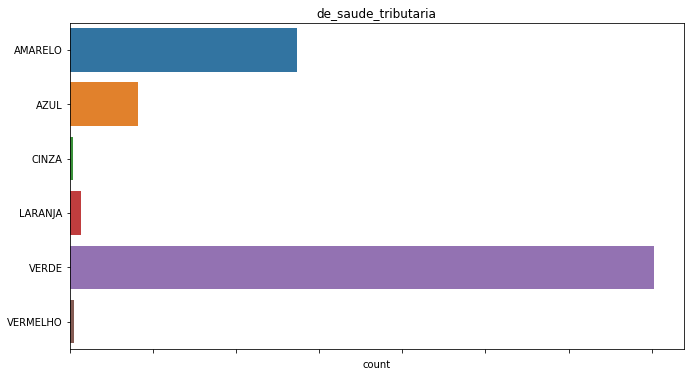

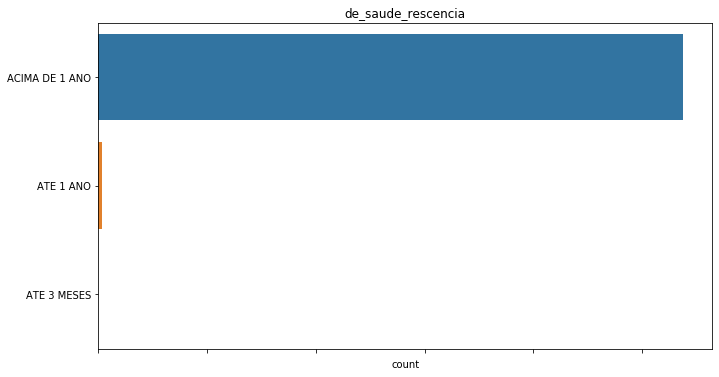

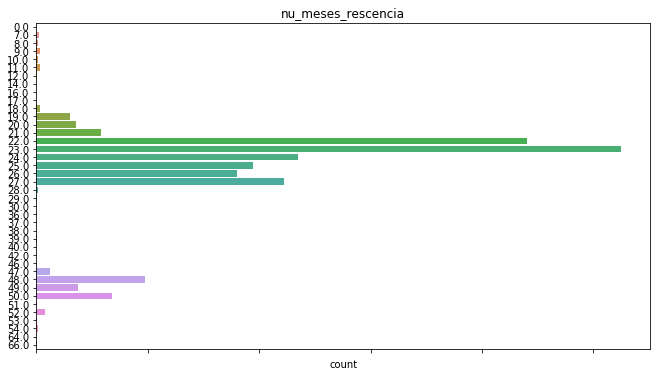

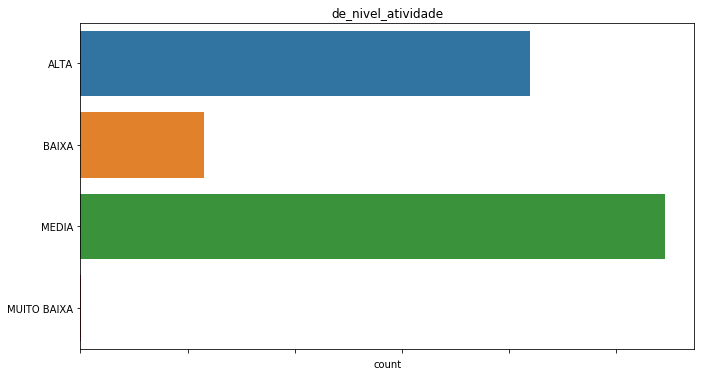

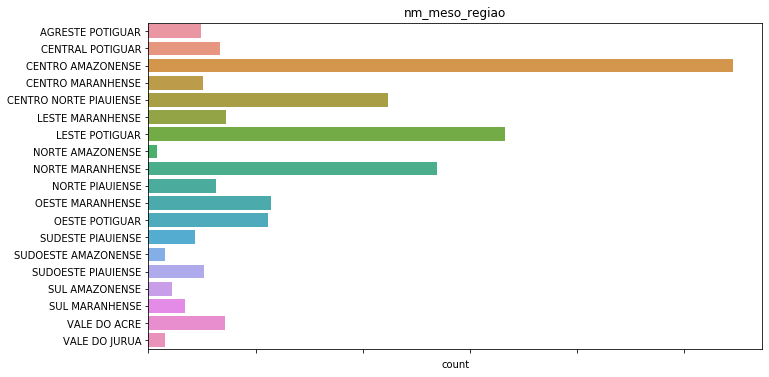

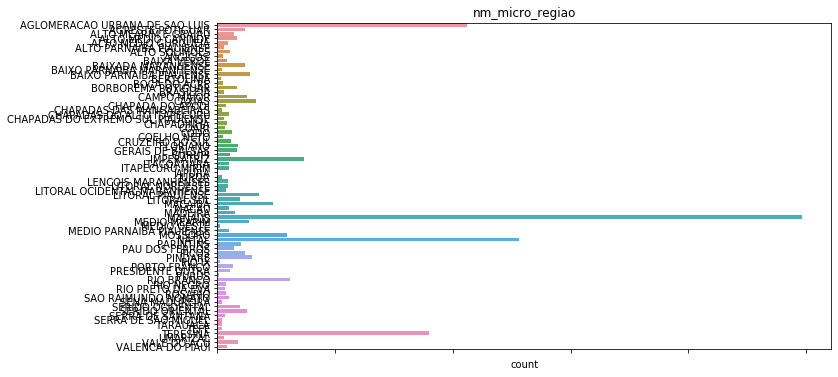

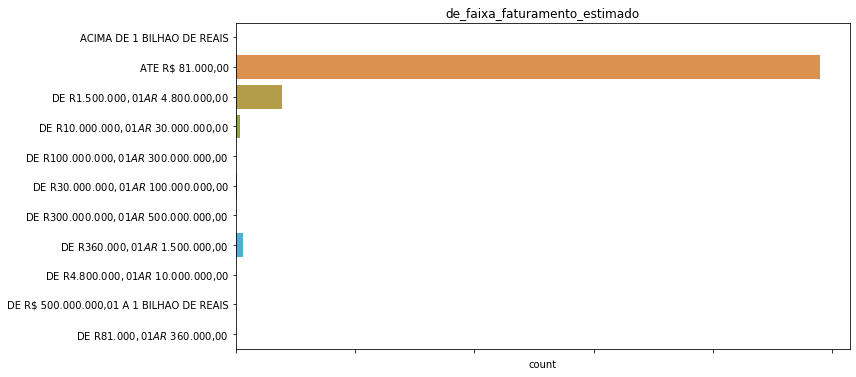

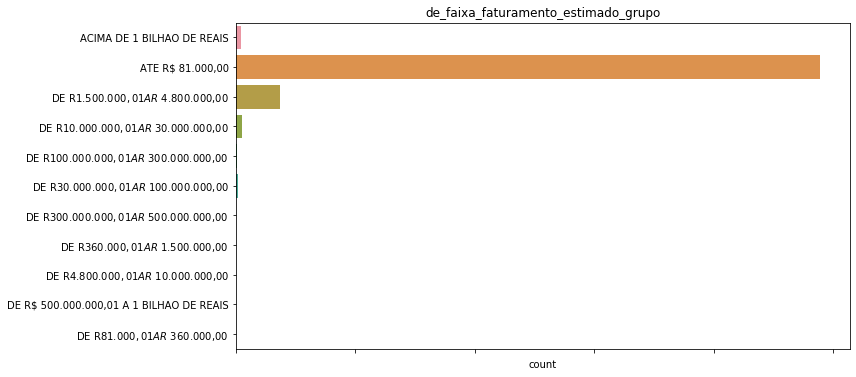

In [29]:
for i in range(len(colunas)):
    generate_countplot(market.loc[market.Clusters== 1,:][colunas[i]])
    plt.title(colunas[i])

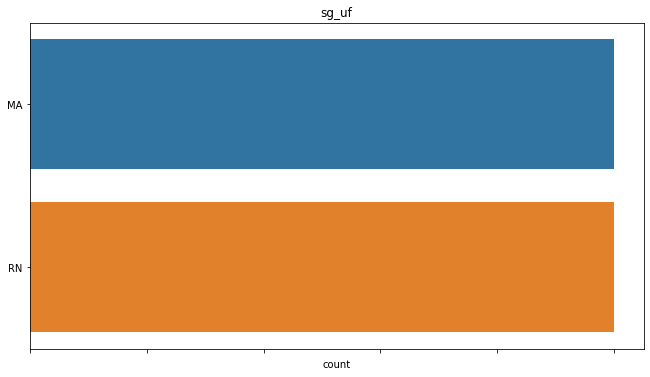

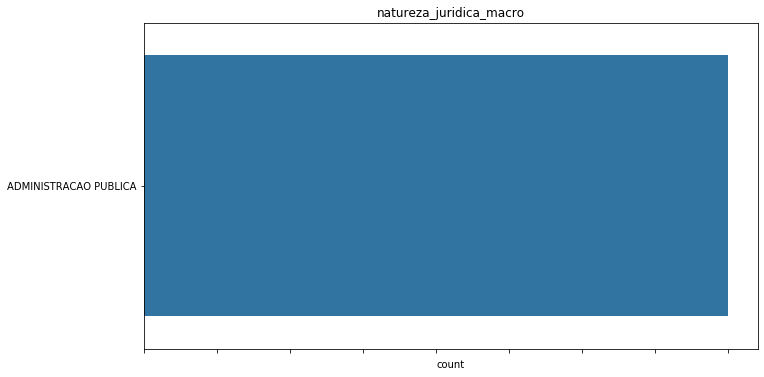

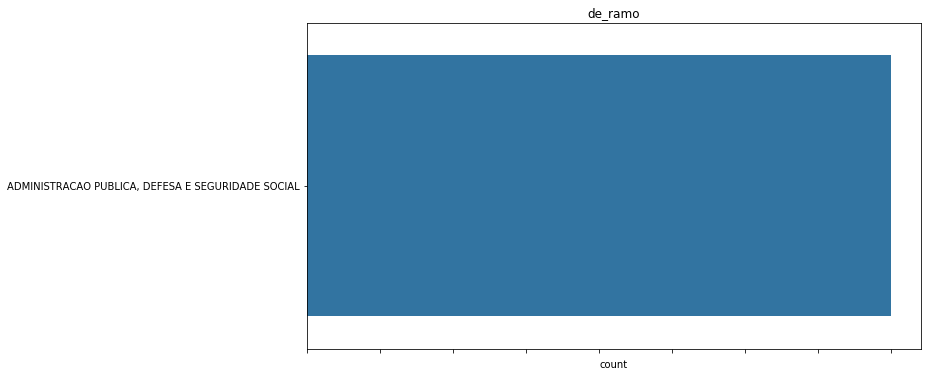

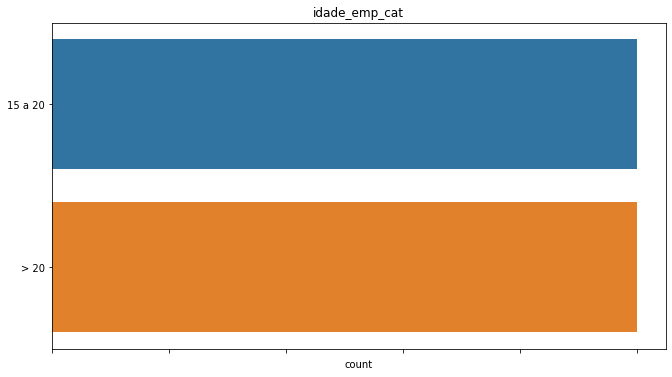

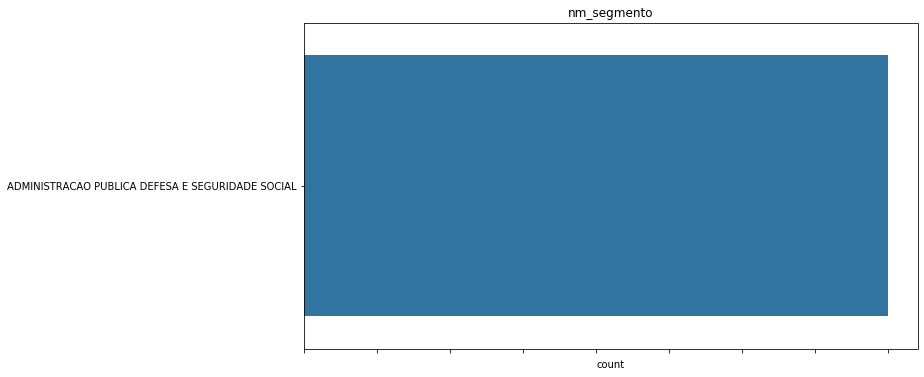

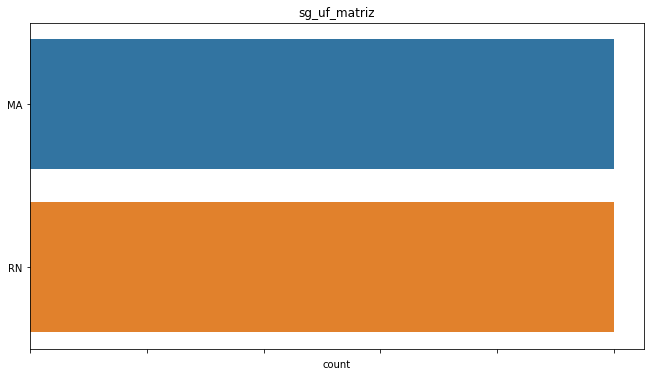

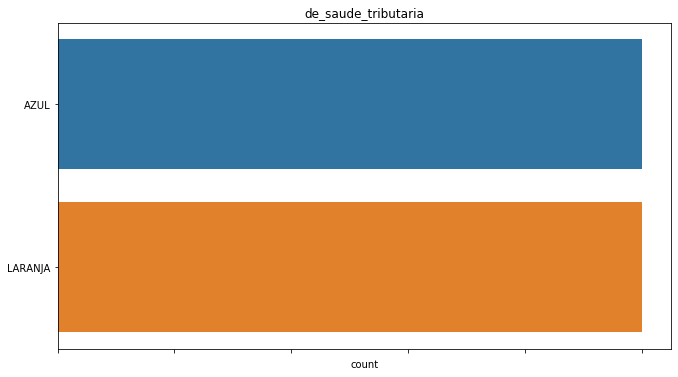

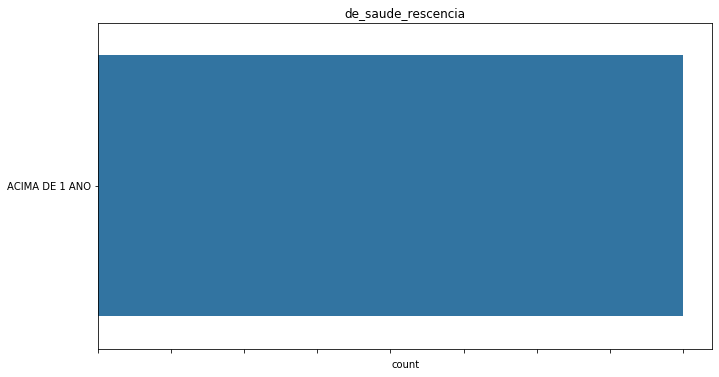

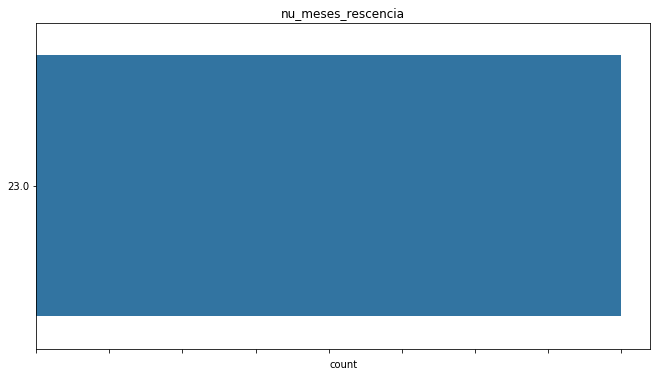

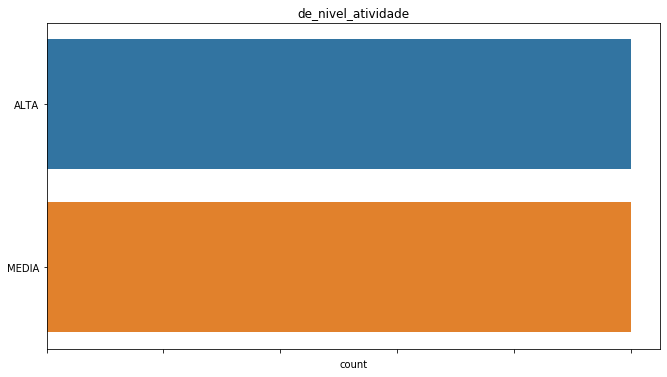

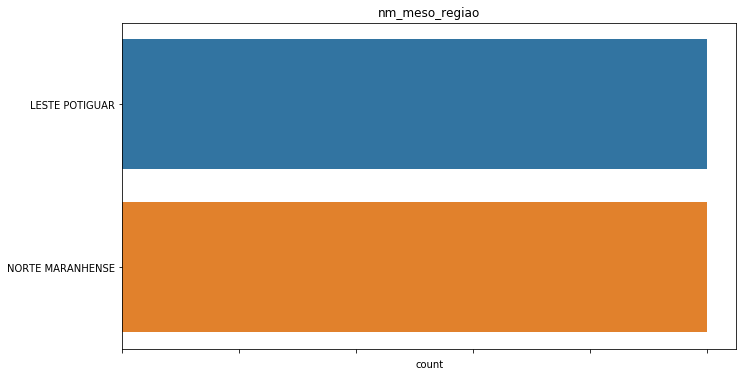

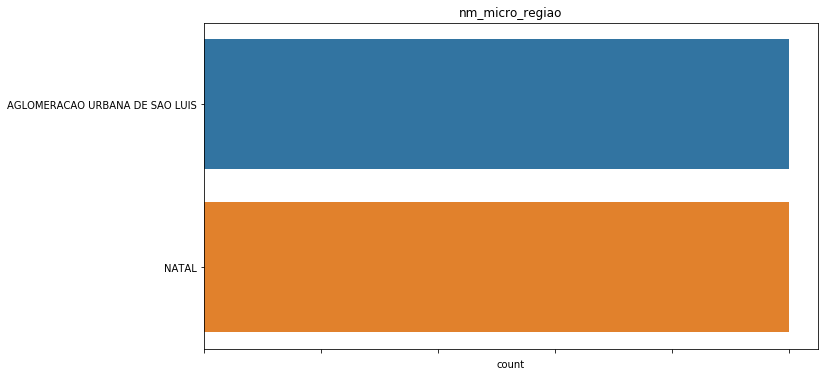

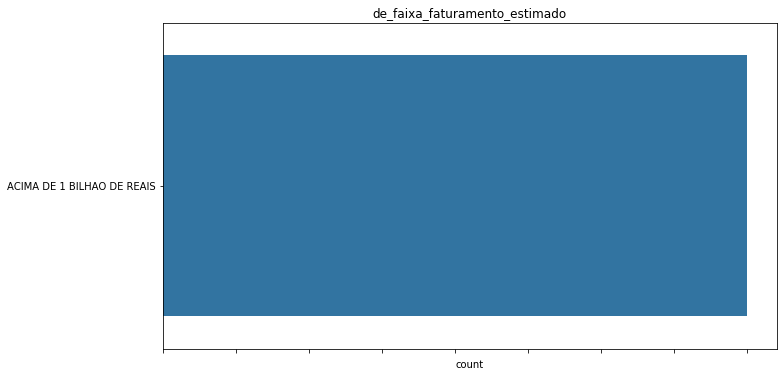

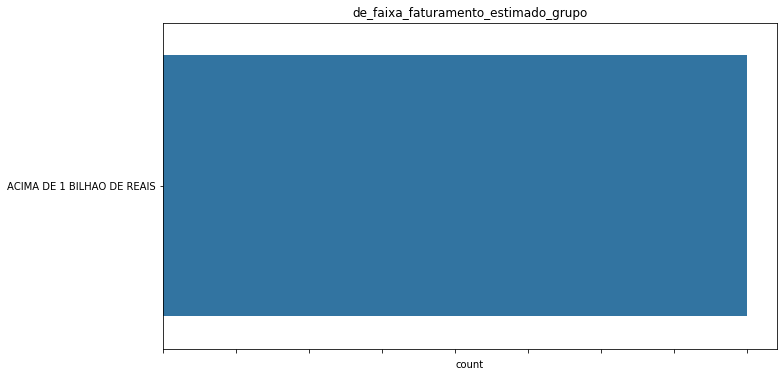

In [30]:
for i in range(len(colunas)):
    generate_countplot(market.loc[market.Clusters== 2,:][colunas[i]])
    plt.title(colunas[i])

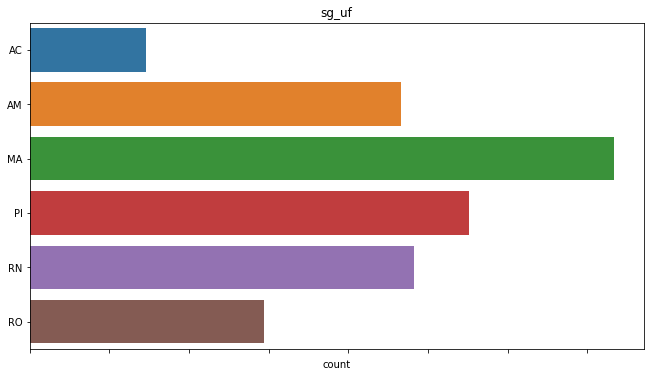

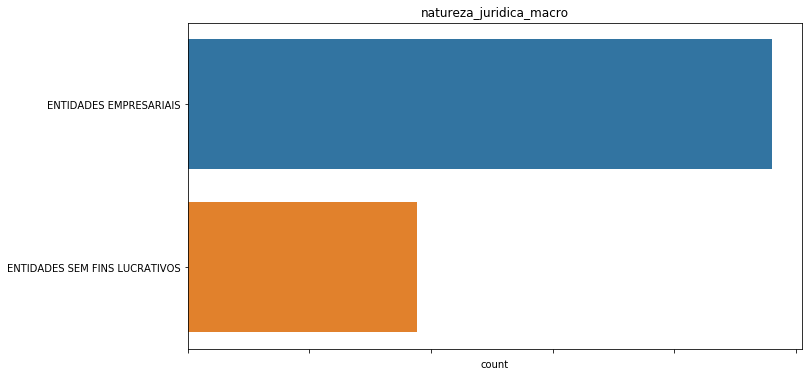

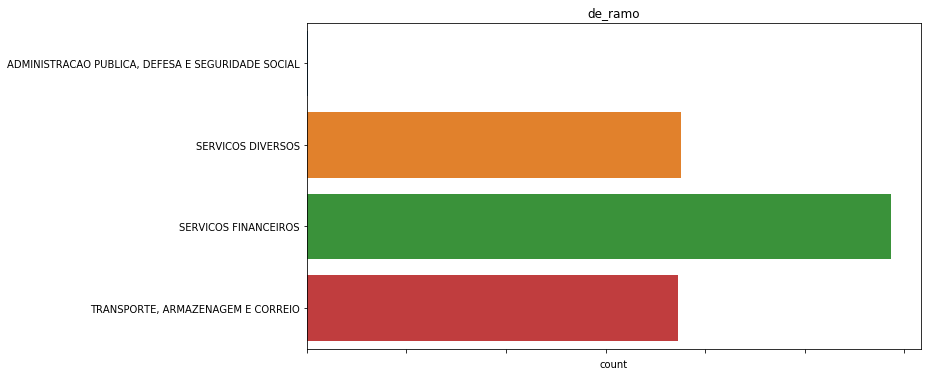

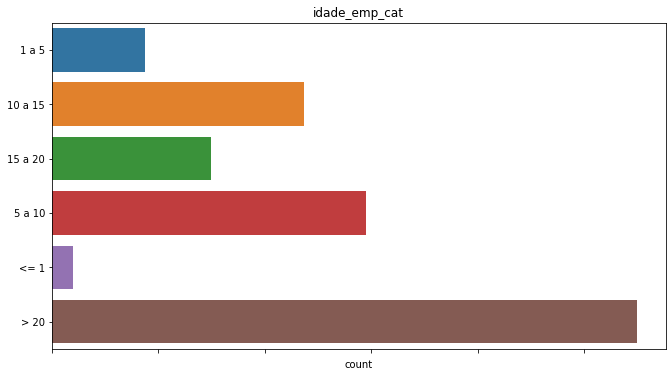

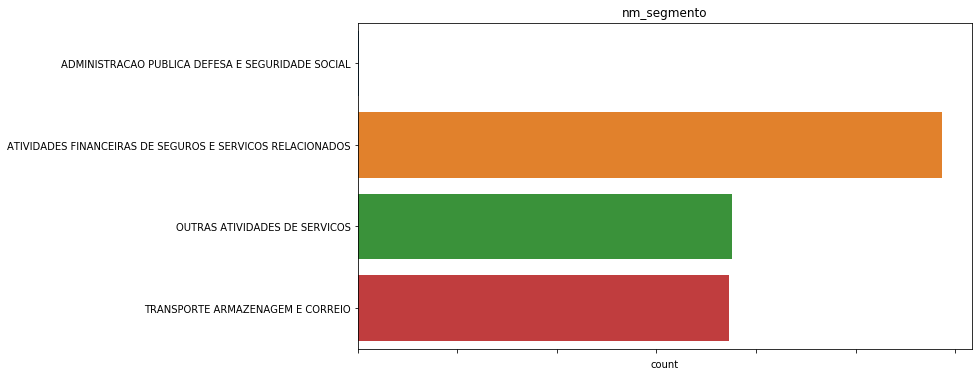

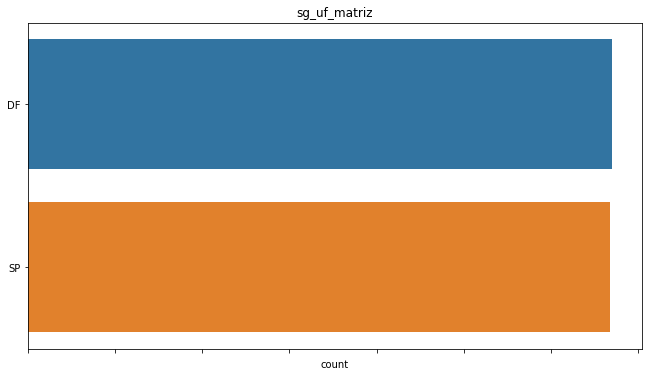

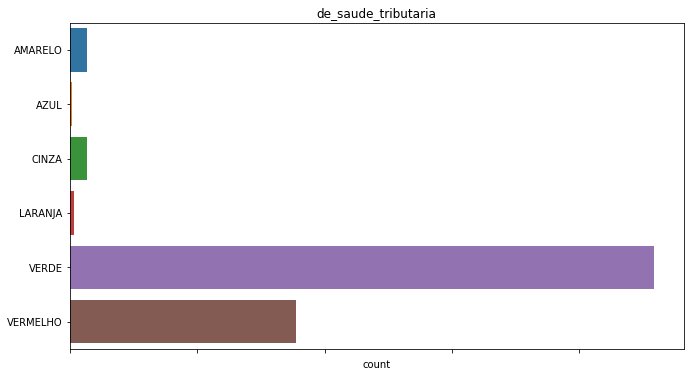

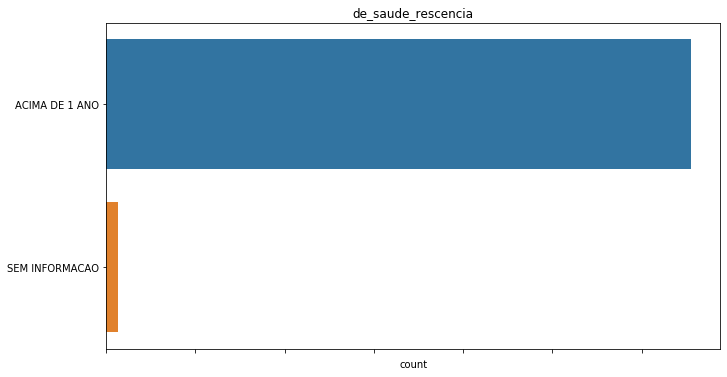

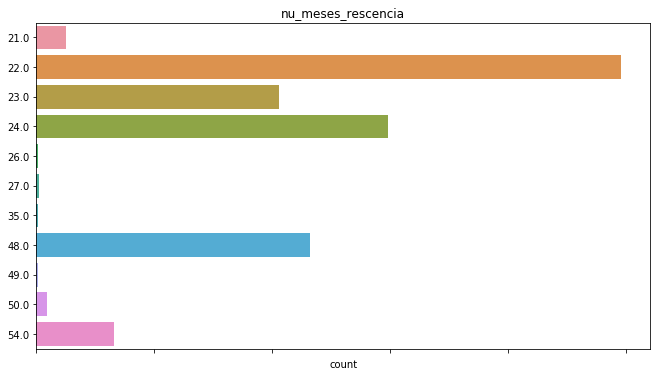

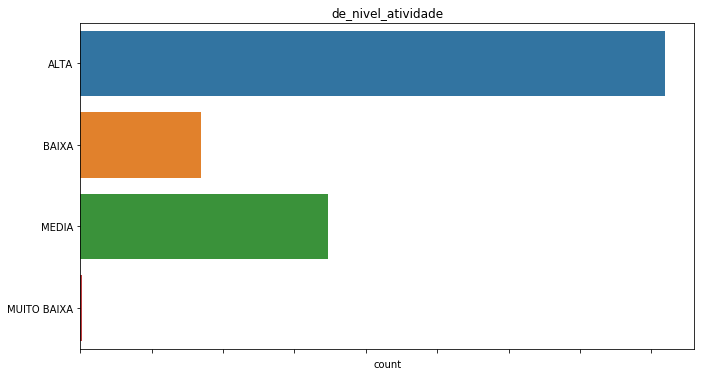

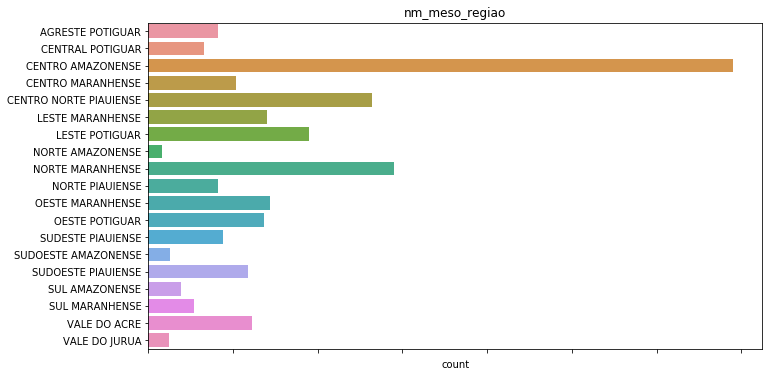

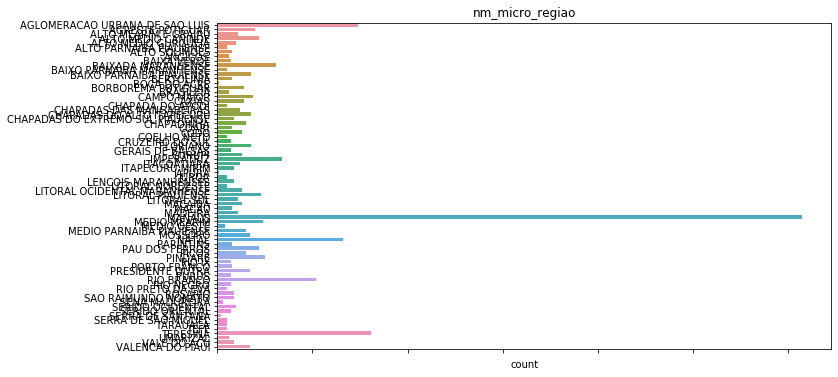

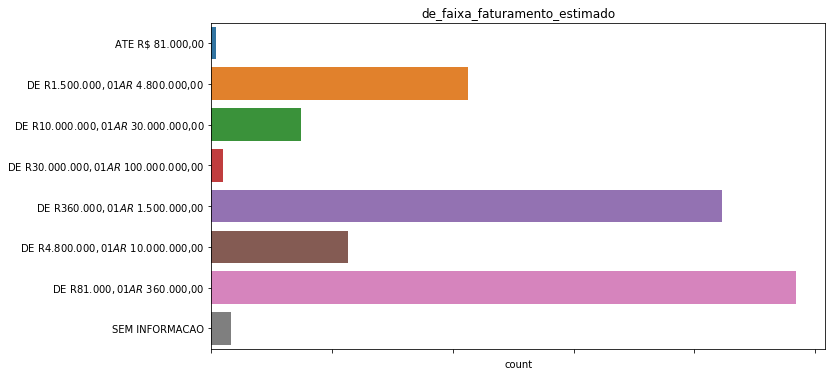

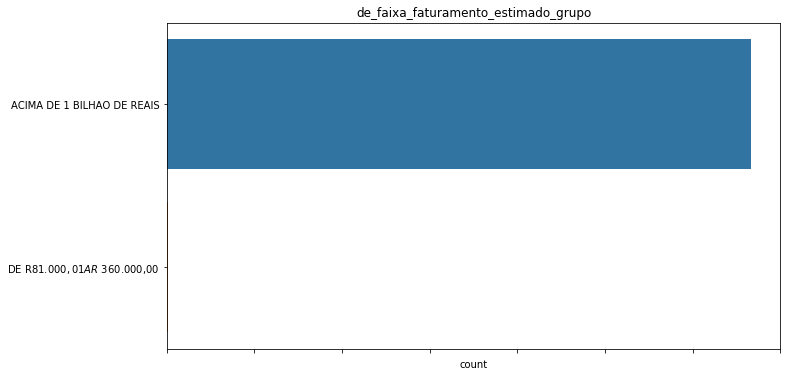

In [31]:
for i in range(len(colunas)):
    generate_countplot(market.loc[market.Clusters== 3,:][colunas[i]])
    plt.title(colunas[i])

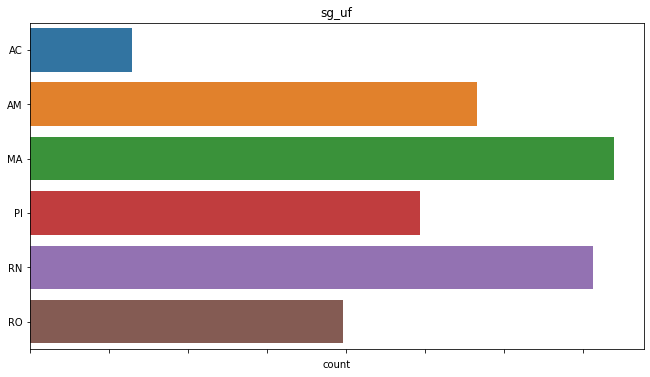

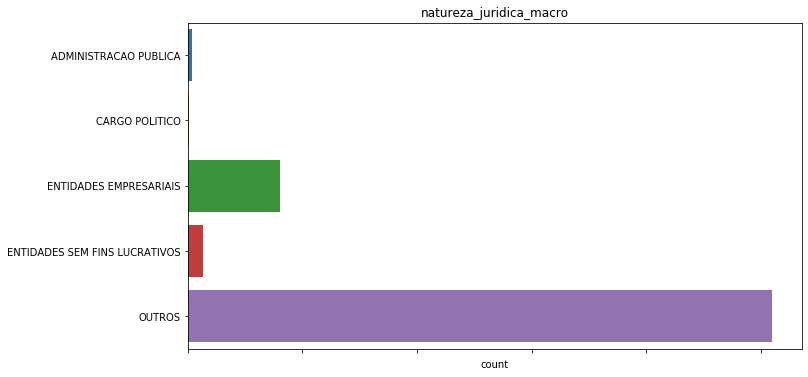

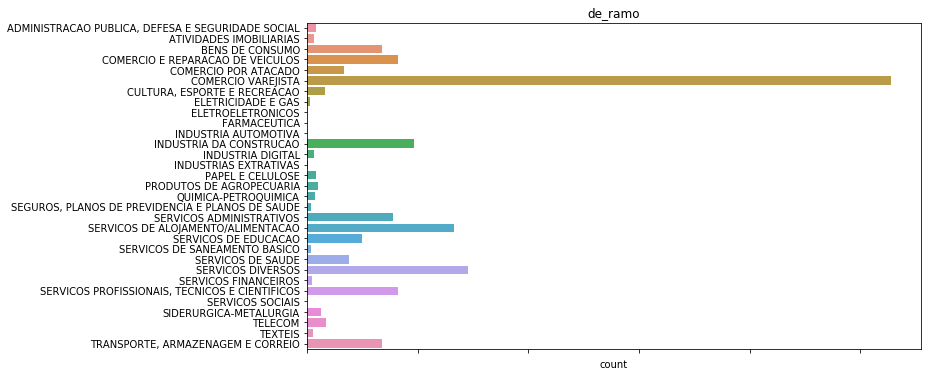

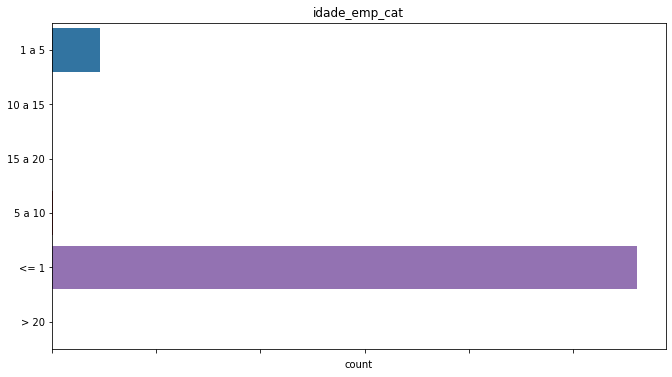

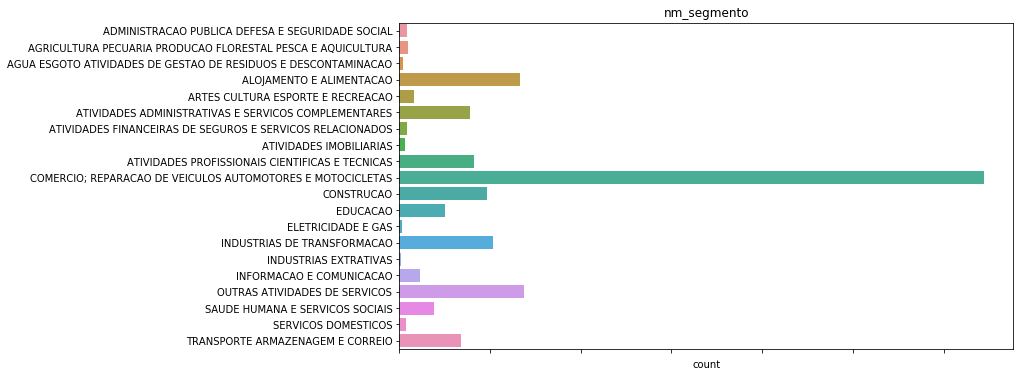

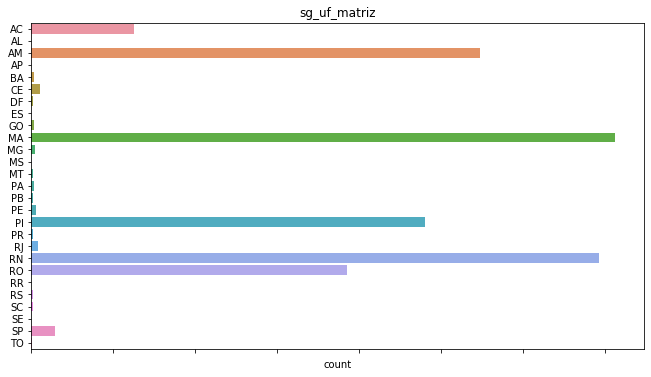

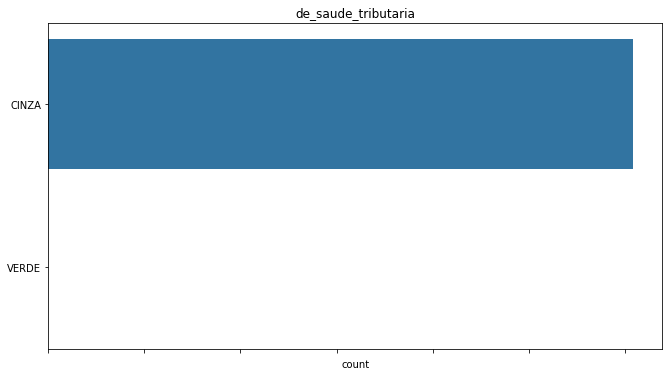

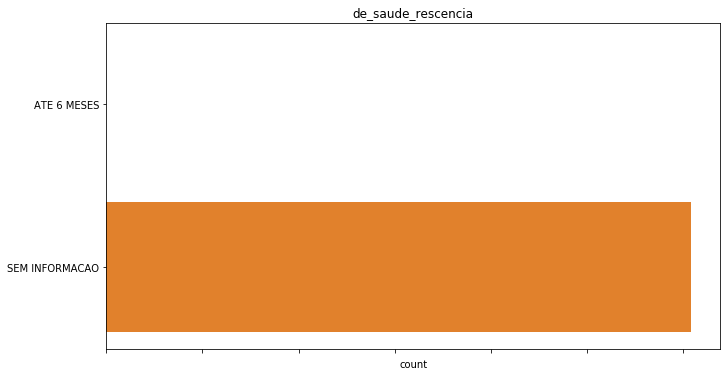

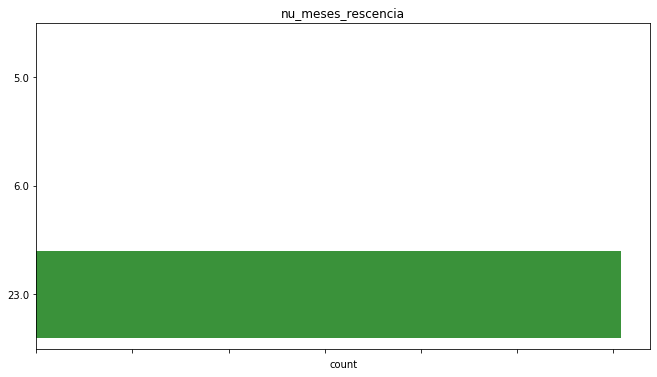

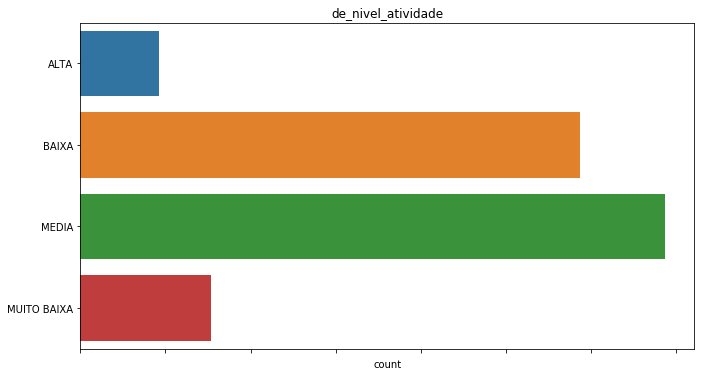

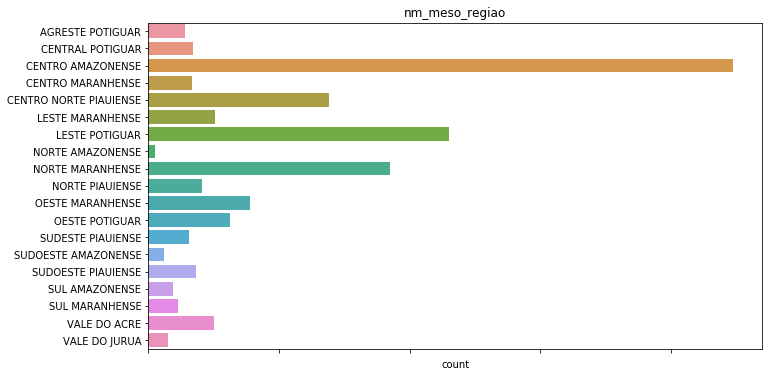

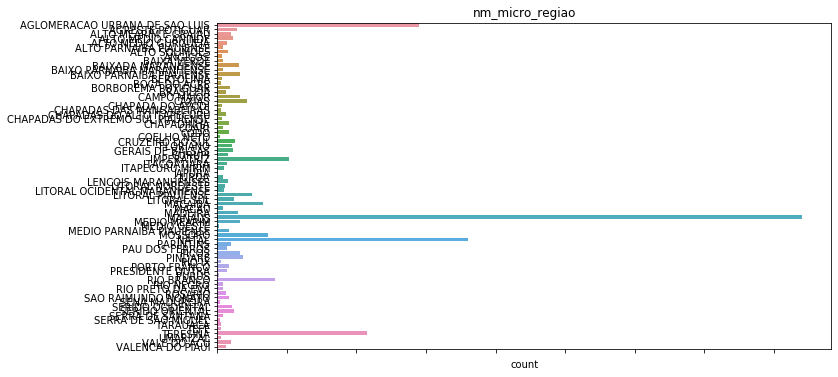

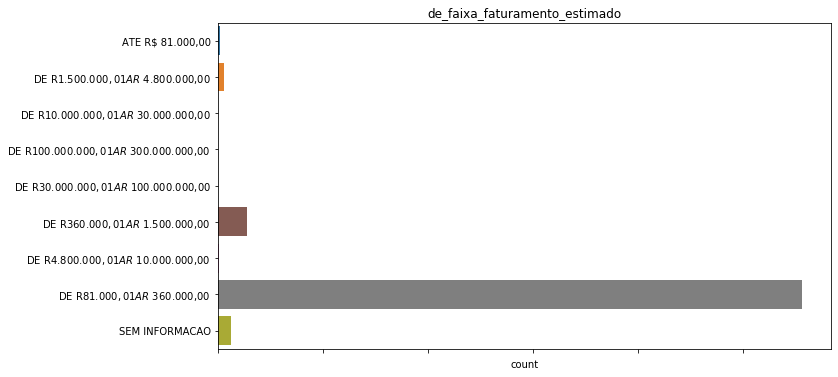

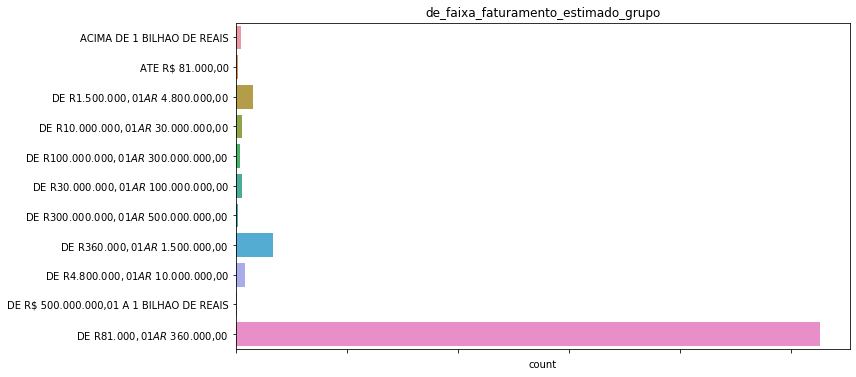

In [32]:
for i in range(len(colunas)):
    generate_countplot(market.loc[market.Clusters== 4,:][colunas[i]])
    plt.title(colunas[i])

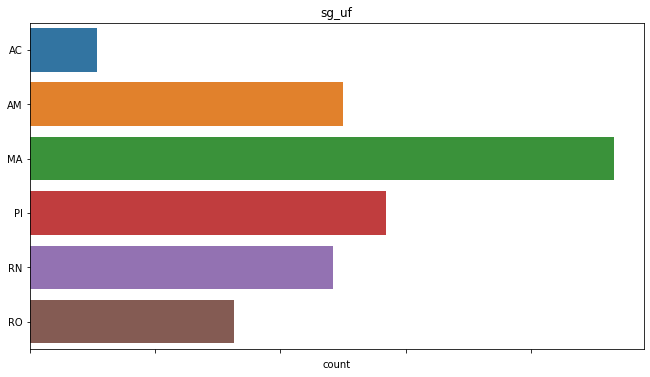

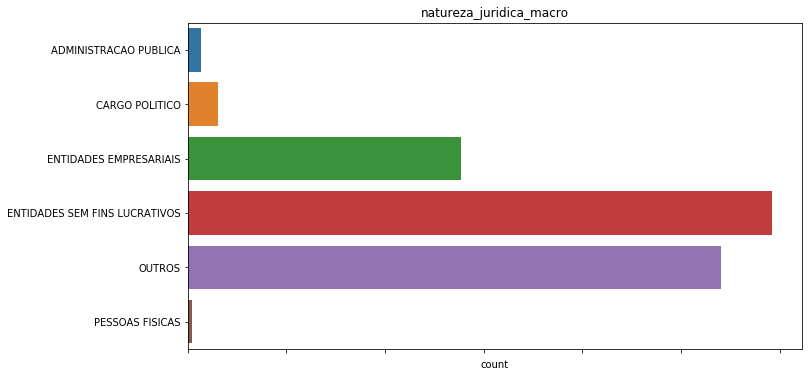

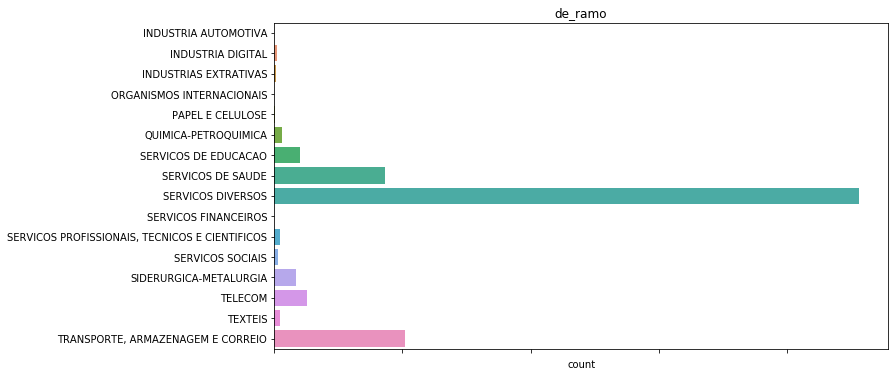

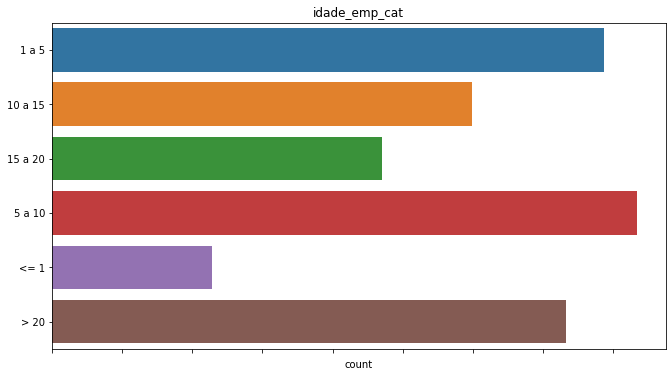

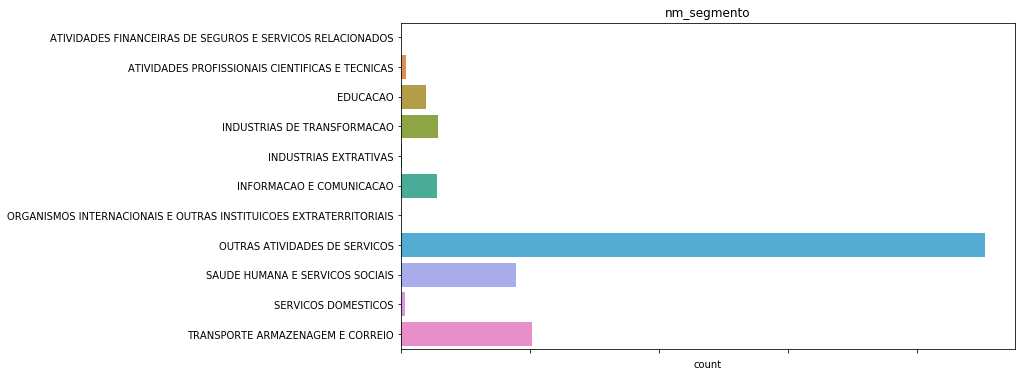

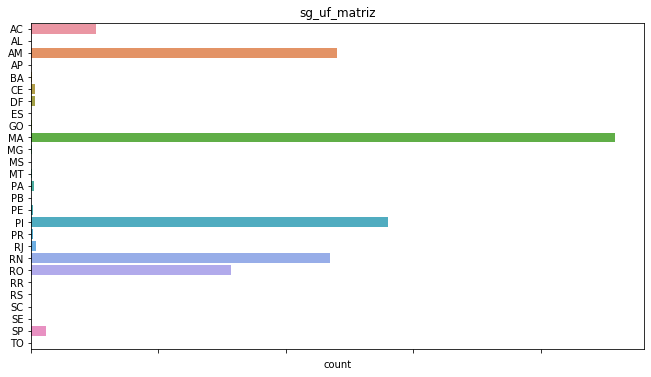

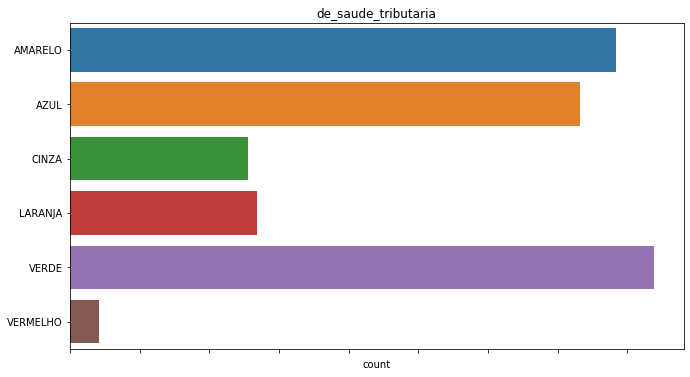

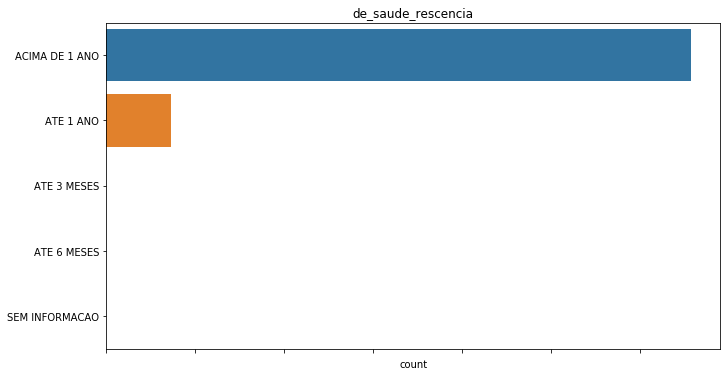

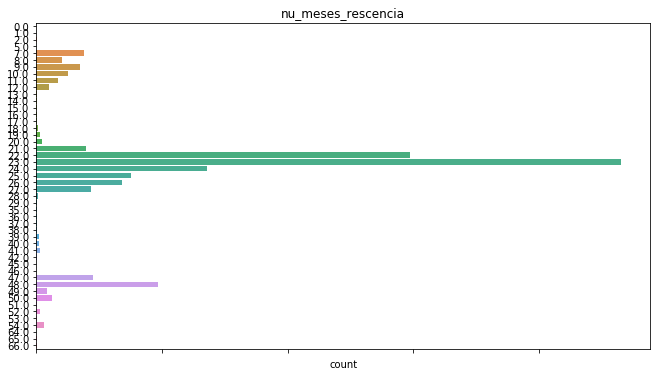

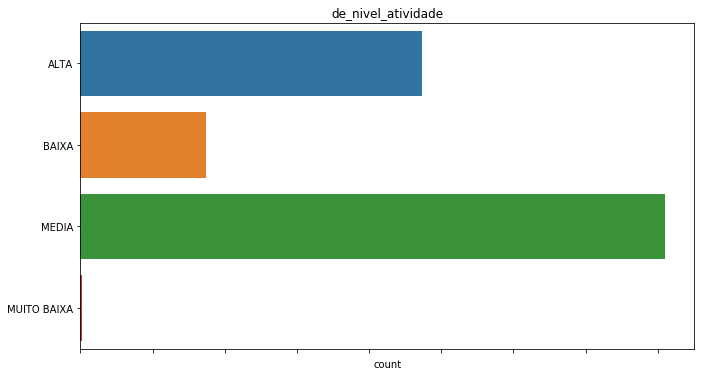

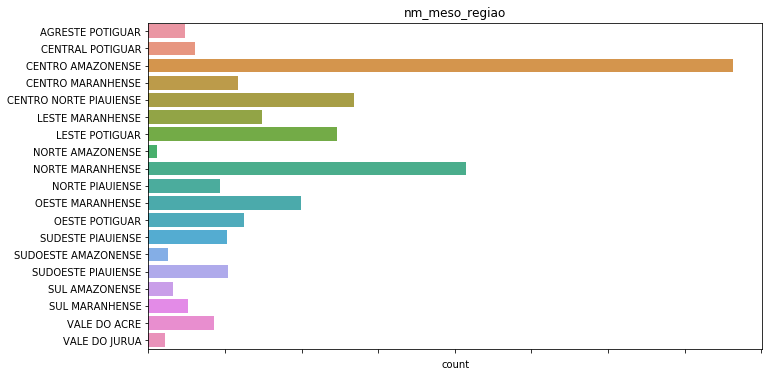

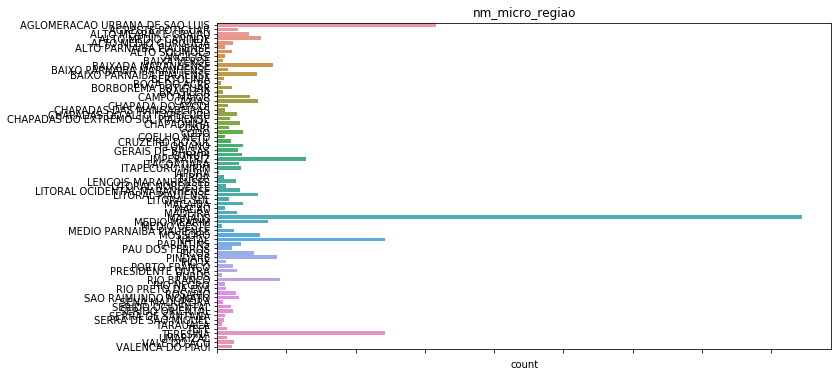

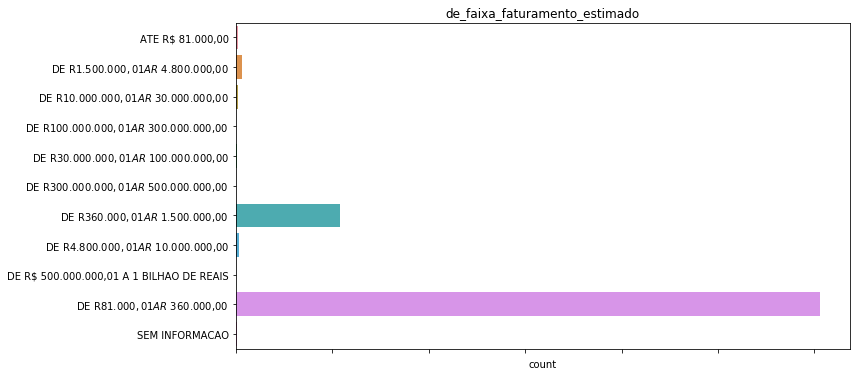

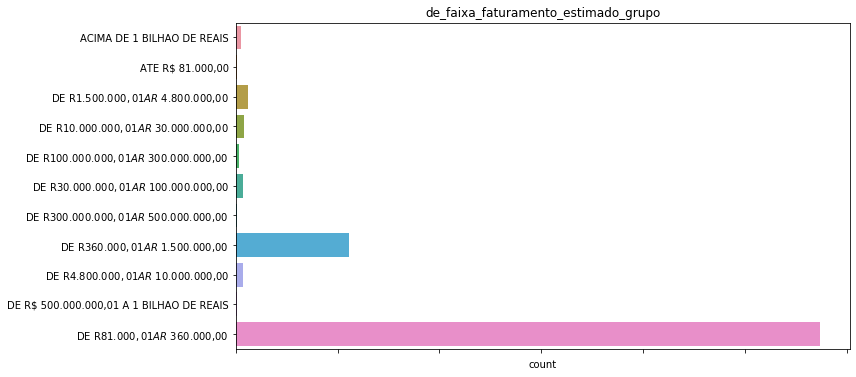

In [33]:
for i in range(len(colunas)):
    generate_countplot(market.loc[market.Clusters== 5,:][colunas[i]])
    plt.title(colunas[i])

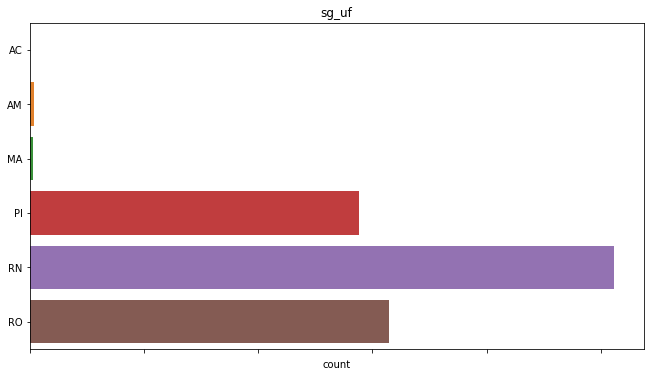

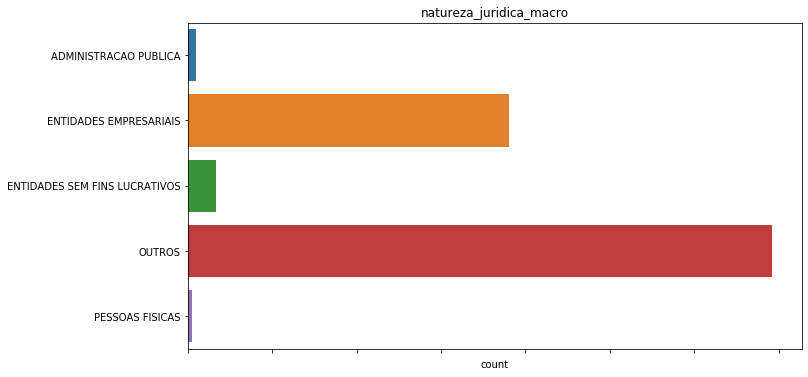

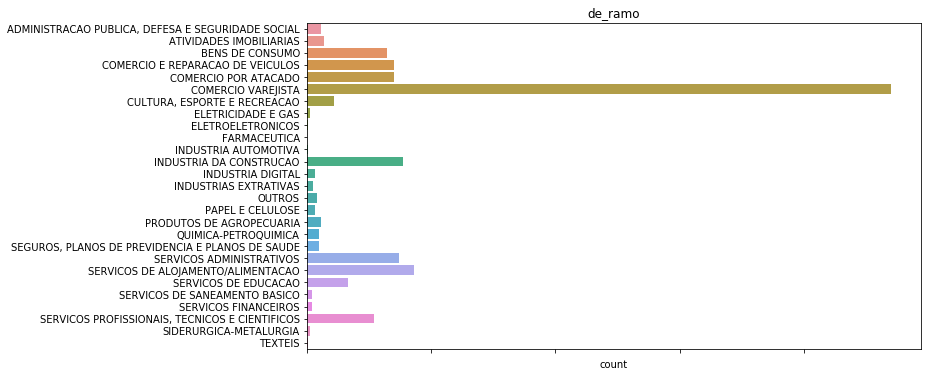

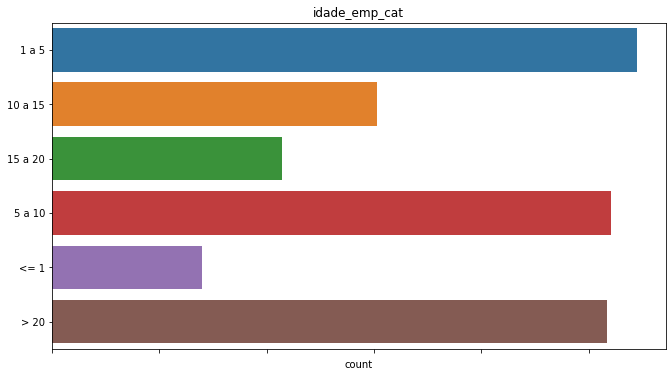

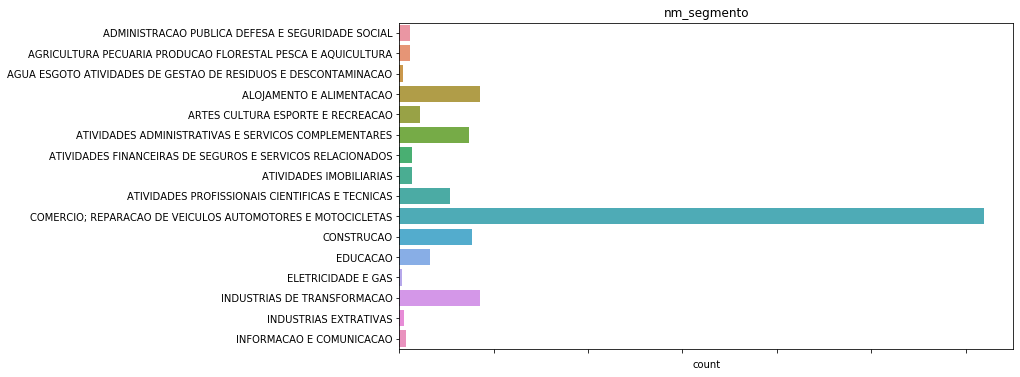

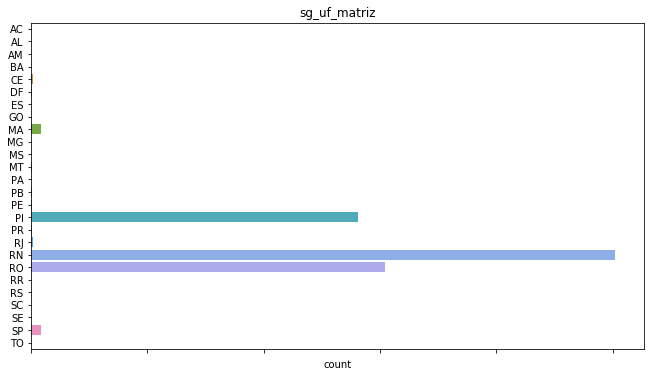

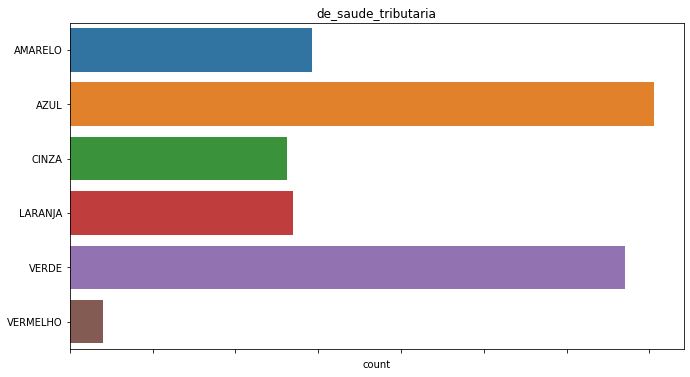

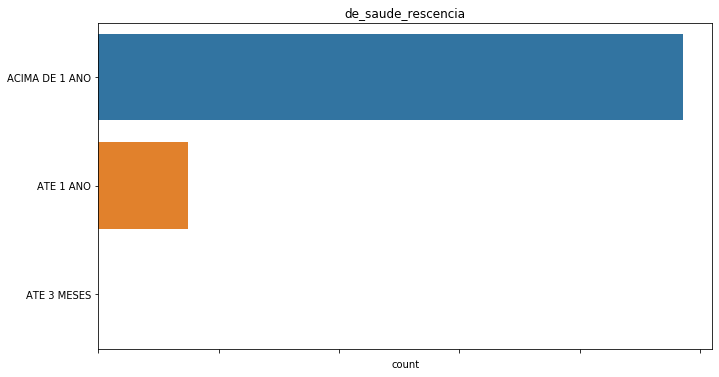

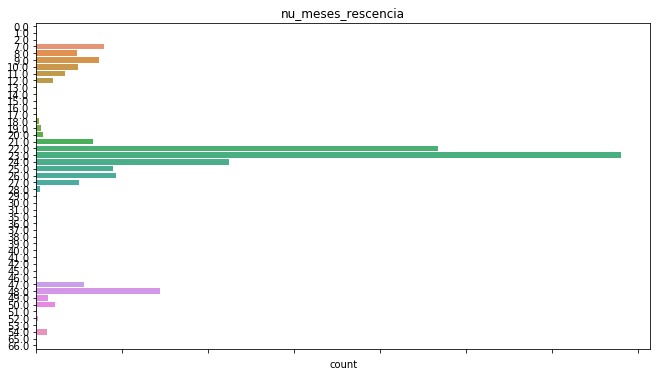

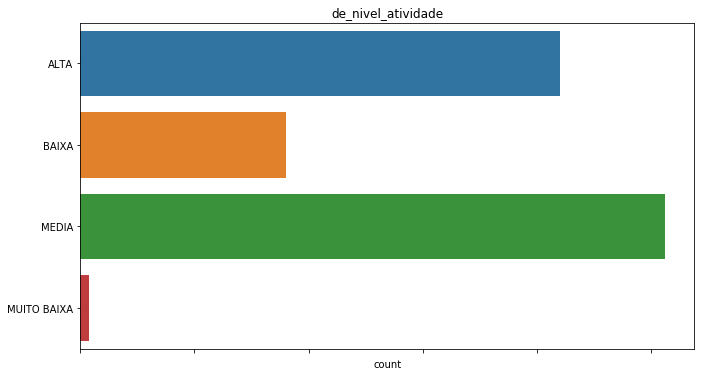

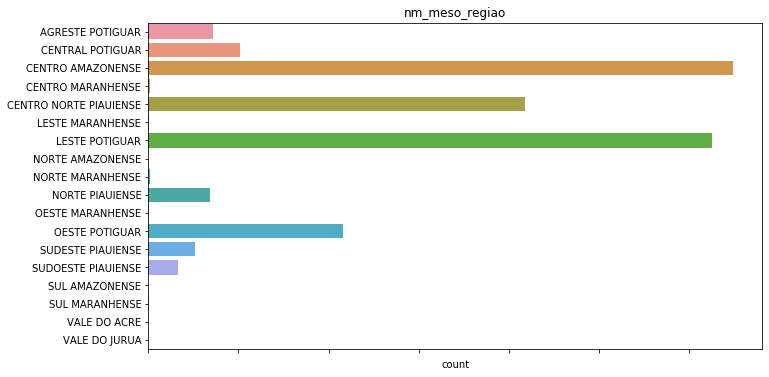

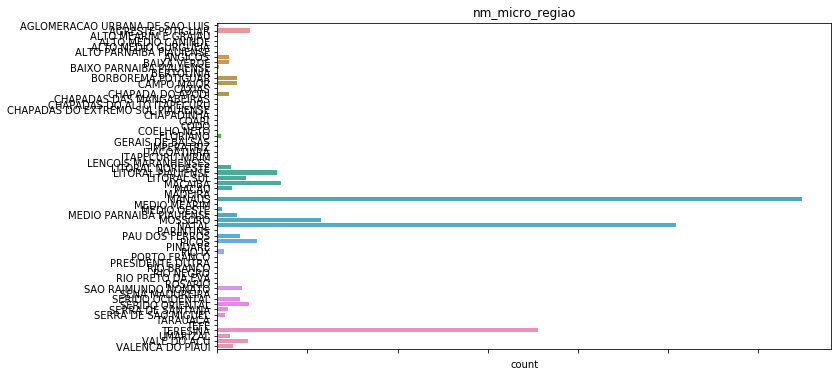

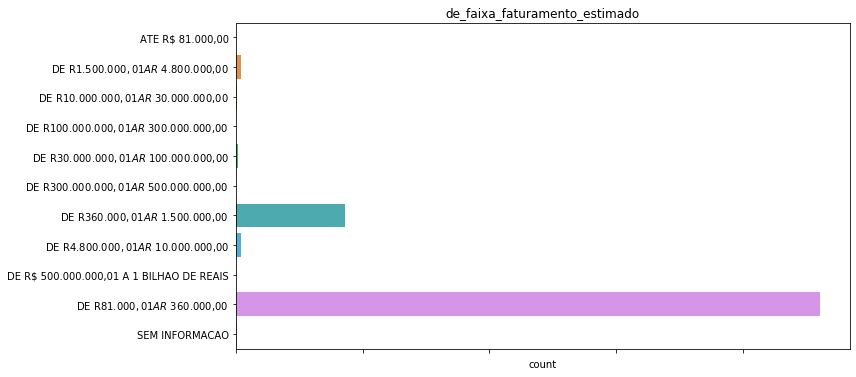

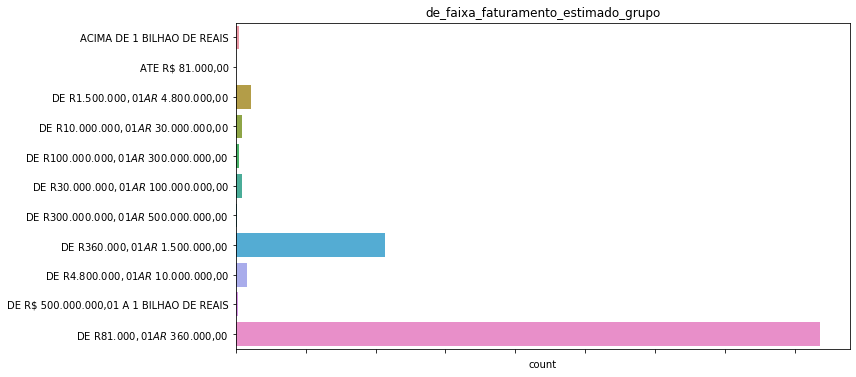

In [34]:
for i in range(len(colunas)):
    generate_countplot(market.loc[market.Clusters== 6,:][colunas[i]])
    plt.title(colunas[i])

## Organizando Output

In [35]:
print(len(ids_portifolio1)==len(portifolio1_cluster))
print(len(ids_portifolio2)==len(portifolio2_cluster))
print(len(ids_portifolio3)==len(portifolio3_cluster))

True
True
True


In [36]:
portifolio1_cluster['id'] = np.array(ids_portifolio1)

C:\Users\geyon\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
portifolio2_cluster['id'] = np.array(ids_portifolio2)

C:\Users\geyon\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
portifolio3_cluster['id'] = np.array(ids_portifolio3)

C:\Users\geyon\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Organizando colunas

In [39]:
portifolio1_cluster.head()

,sg_uf,natureza_juridica_macro,de_ramo,idade_emp_cat,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,qt_filiais,Clusters,id
369,PI,OUTROS,COMERCIO VAREJISTA,<= 1,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,PI,CINZA,SEM INFORMACAO,23.0,BAIXA,SUDOESTE PIAUIENSE,SAO RAIMUNDO NONATO,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,0,4,4c937e4c4cef38264e0aaeaeb43322e546b4418f3d9b93...
604,MA,OUTROS,COMERCIO VAREJISTA,5 a 10,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,MA,VERDE,ACIMA DE 1 ANO,22.0,MEDIA,CENTRO MARANHENSE,MEDIO MEARIM,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 360.000,01 A R$ 1.500.000,00",210000.0,4,0,a94d11a8418e61ac25883d860f2259e9a6cb8e3eaf1e00...
1703,MA,OUTROS,COMERCIO VAREJISTA,5 a 10,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,MA,AZUL,ACIMA DE 1 ANO,24.0,MEDIA,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,0,1,efc5a98a13ac9c8733ad735de0f4937b27e40441b7a059...
2521,RN,OUTROS,COMERCIO VAREJISTA,> 20,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,RN,VERDE,ACIMA DE 1 ANO,26.0,ALTA,OESTE POTIGUAR,UMARIZAL,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,0,1,cdbe1d8ae7a9c080dc025b1b33ad91f097858def5c889d...
5788,RN,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,15 a 20,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,LESTE POTIGUAR,NATAL,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 4.800.000,01 A R$ 10.000.000,00",3029140.8,3,6,571a7461978f95114944695065e774a38f06528d287740...


In [40]:
portifolio1_cluster = portifolio1_cluster[['id','sg_uf', 'natureza_juridica_macro', 'de_ramo', 'idade_emp_cat',
       'nm_divisao', 'nm_segmento', 'sg_uf_matriz', 'de_saude_tributaria',
       'de_saude_rescencia', 'nu_meses_rescencia', 'de_nivel_atividade',
       'nm_meso_regiao', 'nm_micro_regiao', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo', 'vl_faturamento_estimado_aux',
       'qt_filiais', 'Clusters']]

In [41]:
portifolio2_cluster = portifolio2_cluster[['id','sg_uf', 'natureza_juridica_macro', 'de_ramo', 'idade_emp_cat',
       'nm_divisao', 'nm_segmento', 'sg_uf_matriz', 'de_saude_tributaria',
       'de_saude_rescencia', 'nu_meses_rescencia', 'de_nivel_atividade',
       'nm_meso_regiao', 'nm_micro_regiao', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo', 'vl_faturamento_estimado_aux',
       'qt_filiais', 'Clusters']]

In [42]:
portifolio3_cluster = portifolio3_cluster[['id','sg_uf', 'natureza_juridica_macro', 'de_ramo', 'idade_emp_cat',
       'nm_divisao', 'nm_segmento', 'sg_uf_matriz', 'de_saude_tributaria',
       'de_saude_rescencia', 'nu_meses_rescencia', 'de_nivel_atividade',
       'nm_meso_regiao', 'nm_micro_regiao', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo', 'vl_faturamento_estimado_aux',
       'qt_filiais', 'Clusters']]

In [43]:
market['id'] = ids_market

In [44]:
market = market[['id','sg_uf', 'natureza_juridica_macro', 'de_ramo', 'idade_emp_cat',
       'nm_divisao', 'nm_segmento', 'sg_uf_matriz', 'de_saude_tributaria',
       'de_saude_rescencia', 'nu_meses_rescencia', 'de_nivel_atividade',
       'nm_meso_regiao', 'nm_micro_regiao', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo', 'vl_faturamento_estimado_aux',
       'qt_filiais', 'Clusters']]

In [45]:
#salvando em csv.
market.to_csv('market_cluster.csv',index=False)
portifolio1_cluster.to_csv('portifolio1_cluster.csv',index=False)
portifolio2_cluster.to_csv('portifolio2_cluster.csv',index=False)
portifolio3_cluster.to_csv('portifolio3_cluster.csv',index=False)

## Conclusão:
    - O resultado da tarefa é o número dos clusters, ou seja, cada cluster tem suas próprias características, permitindo criar um lookalike. Por exemplo: uma empresa X que pertence ao cluster 0 comprou um produto Y, é muito provável que outra empresa (K) também pertencente ao cluster 0 compre o produto Y.